# **Global management and outcomes of infant myelomeningocele-associated hydrocephalus: a systematic review and meta-analysis**

This Jupyter Notebook presents a systematic review and meta-analysis that delves into the global management and outcomes of myelomeningocele-associated hydrocephalus in infants. By thoroughly evaluating pertinent studies, our analysis seeks to provide insights into the range of treatments, interventions, and outcomes within diverse economic contexts.

You can access the full preprint on medRxiv [here](**#TODO for Alvaro**: Add link).

The primary purpose of this Jupyter Notebook is to facilitate your interactive exploration of our dataset. In the following pages, you will encounter concise descriptions of the work performed, but the focal point is the visual representation of the data, created using [plotly](https://plotly.com). Please note that there won't be sections dedicated to discussing or interpreting these results; for such insights, please refer to the preprint.

You can navigate this document by using the Table of Contents (on the right-hand sidebar).

### **Setup**

We set up our environment by importing necessary libraries and loading our primary dataset from an Excel file. The dataset is organized into multiple sheets, each representing different facets of our study. Specifically, we load the following sheets into their respective DataFrames:

- 'Studies': Contains general information about the studies considered.
- 'ROB' (Risk of Bias): Captures the risk of bias associated with each study.
- 'Features': Provides features or characteristics of the studies.
- 'Management': Details the management strategies employed in the studies.
- 'Outcomes': Enumerates the outcomes observed in the studies."

In [1]:
#TODO: Update links below once github is moved to Alvaro's repo

import pandas as pd

#Run this cell in Google Colab to install the required packages
!wget https://github.com/nooralteneiji/Myelomeningocele-Associated-Hydrocephalus-A-Systematic-Review-and-Meta-Analysis/blob/main/requirements.txt # here place the URL link to the github file that has the equirements.tx file
!wget https://github.com/nooralteneiji/Myelomeningocele-Associated-Hydrocephalus-A-Systematic-Review-and-Meta-Analysis/blob/main/Data.xlsx # here place the URL link to the github file that has the data.xlsx file
!pip install -r requirements.txt
!echo "install.packages(\"metafor\", repos=\"https://cran.rstudio.com\")" | R --no-save
!echo "install.packages(\"multcomp\", repos=\"https://cran.rstudio.com\")" | R --no-save

#TODO: Make sure to update links once repo moved to Alvaro's gacount

#URL to the raw Excel file on GitHub
excel_url = 'https://github.com/nooralteneiji/Myelomeningocele-Associated-Hydrocephalus-A-Systematic-Review-and-Meta-Analysis/raw/main/Data.xlsx'

#Load sheets from Excel file into DataFrames
df_studies    = pd.read_excel(excel_url, sheet_name='Studies')
df_rob        = pd.read_excel(excel_url, sheet_name='ROB')
df_features   = pd.read_excel(excel_url, sheet_name='Features')
df_management = pd.read_excel(excel_url, sheet_name='Management')
df_outcomes   = pd.read_excel(excel_url, sheet_name='Outcomes')

--2023-11-12 16:52:18--  https://github.com/nooralteneiji/Myelomeningocele-Associated-Hydrocephalus-A-Systematic-Review-and-Meta-Analysis/blob/main/requirements.txt
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7440 (7.3K) [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]   7.27K  --.-KB/s    in 0s      

2023-11-12 16:52:19 (66.1 MB/s) - ‘requirements.txt’ saved [7440/7440]

--2023-11-12 16:52:19--  https://github.com/nooralteneiji/Myelomeningocele-Associated-Hydrocephalus-A-Systematic-Review-and-Meta-Analysis/blob/main/Data.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5740 (5.6K) [text/plain]
Saving to: ‘Data.xlsx’

Data.xlsx           100%[===================>]   5.61K  --.-KB/s 

### **Figure 1. PRISMA diagram.**

The Sankey diagram in Figure 1 serves to give a clear and transparent view of the review process, showing the number of articles obtained from various sources, the number excluded at each step, and the reasons for their exclusion.

We used the [EMBASE](https://www.embase.com), [MEDLINE](https://www.nlm.nih.gov/medline/index.html), [PubMed](https://pubmed.ncbi.nlm.nih.gov), [AJOL](https://www.ajol.info/index.php/ajol), [GIM](https://www.globalindexmedicus.net/), [Cochrane](https://www.cochranelibrary.com), and [SciELO](https://scielo.org/en/) database and retrieved all the records mentioning synonyms of ‘hydrocephalus’ and ‘myelomeningocele’, as in [McCarthy _et al_ (2019)](http://dx.doi.org/10.3171/2019.7.FOCUS19469):

In [2]:
#TODO: Check that "Ante-natal intervention" & "antenatal intervention" reasons
#      in abstract screening set refers to HC sx NOT MMC sx

#TODO: Fix #N/A's in first sheet below. After fixing, count PRISMA again,
# and hope that the problem with the missing articles (mentioned below) disappears!
# - Data["Screening"]: https://docs.google.com/spreadsheets/d/1FHxoODwjcbDVgmH3g6BzLU65Gf4IVWZr5XNxO4ksoFw/edit#gid=863864427
# - Abstracts: https://docs.google.com/spreadsheets/d/1BJSV3WBYJGRhQ6zExamkszQ5VutGIcaQqmbD9ZTVXMQ/edit#gid=1251630045
# - Full texts: https://docs.google.com/spreadsheets/d/1qpEmbGH0JjaJbUdp21-y2cPbobDbMjr09BbtdKROZWc/edit#gid=1444865654
# - Extraction sheet: https://docs.google.com/spreadsheets/d/1kGrh75X1cNR1D7_FcY9zMnHP8iPO4M5RCRjy6nZY0TY/edit#gid=0

#TODO: Need to resolve missing
# - Abstracts:  325 ending ab screening vs. 318 starting ft screening (i.e. 7 missing!)
# - Full-texts: 181 ending ft screening vs. 168 starting extraction (i.e. 13 missing!)
#   - Clarify what does 'No disaggregate data on MMCaHC' mean.

#TODO: Need to add reasons for exclusion for 84 excluded articles
# on data extraction to Supp Text 2 using master sheet above.

import plotly.graph_objects as go

#Text that will go in the nodes of the Sankey diagram
node_text = [

    #Data sources
    "EMBASE (N=1658)",
    "MEDLINE (N=1181)",
    "PubMed (N=1074)",
    "AJOL",
    "GIM",
    "Cochrane",
    "SciELO",

    #Total no. studies
    "Total<br>identified<br>(N=4091)",

    #Deduplication
    "Duplicates",
    "Abstract<br>screening<br>(N=2185)",

    #Abstract screening
    "Duplicates",
    "Wrong publication type",
    "Wrong study design",
    "Wrong study population",
    "Wrong intervention",
    "Wrong outcome",
    "No full text",
    "Full-text screening<br>(N=343)",

    #Full-text screening
    "Duplicates",
    "Wrong publication type",
    "Wrong study design",
    "Wrong study population",
    "Wrong intervention",
    "Wrong outcome",
    "No full text",
    "Data extraction<br>(N=189)",

    #Data extraction
    "Excluded on extraction",
    "Included in review<br>(N=84)"
]


#Text that will go in the links ('branches') of the Sankey diagram
link_text = [

    #Data sources
    'Obtained from the EMBASE database',
    'Obtained from the MEDLINE database',
    'Obtained from the PubMed database',
    'Obtained from the AJOL database',
    'Obtained from the GIM database',
    'Obtained from the Cochrane database',
    'Obtained from the SciELO database',

    #Deduplication
    'Duplicated titles and abstracts',
    'Eligible for abstract screening',

    #Abstract screening
    'Duplicated titles and abstracts',
    """
      PUBLICATION TYPE<br>
      Exclusion criteria:<br>
      - is not peer-reviewed article; OR<br>
      - is opinion piece, comment, letter, guideline, literature review, or editorial.
    """,
    """
      STUDY DESIGN<br>
      Exclusion criteria:<br>
      - is single-case report, systematic review, or meta-analysis; OR<br>
      - is qualitative study.
    """,
    """
      POPULATION<br>
      Exclusion criteria:<br>
      - is not study on human infant population  (i.e., age >2 years); OR<br>
      - no hydrocephalus; OR<br>
      - hydrocephalus is not due to MMC*<br>
      - global study where data from many countries has been pooled AND<br>
        we cannot distinguish from which country each data comes from.<br><br>
      *Meningocoele and myelocoele are not the same as MMC.
    """,
    """
      INTERVENTION<br>
      Exclusion criteria:<br>
      - Fetal surgery. (TODO: CLARIFY IF HC, MMC, OR BOTH)
    """,
    """
      OUTCOME<br>
      Exclusion criteria:<br>
      - Outcome of study is neither treatment failure; NOR<br>
      - Mortality; NOR<br>
      - Morbidity; NOR<br>
      - Resolution of clinical OR radiological signs of hydrocephalus.
    """,
    """
      FULL-TEXT<br>
      Exclusion criteria:<br>
      - Full-text unavailable OR inaccessible.
    """,
    'Eligible for full-text screening',

    #Full-text screening
    'Duplicated full-texts',
    """
      PUBLICATION TYPE<br>
      Exclusion criteria:<br>
      - is not peer-reviewed article; OR<br>
      - is opinion piece, comment, letter, guideline, literature review, or editorial.
    """,
    """
      STUDY DESIGN<br>
      Exclusion criteria:<br>
      - is single-case report, systematic review, or meta-analysis; OR<br>
      - is qualitative study.
    """,
    """
      POPULATION<br>
      Exclusion criteria:<br>
      - is not study on human infant population  (i.e., age >2 years); OR<br>
      - no hydrocephalus; OR<br>
      - hydrocephalus is not due to MMC*<br>
      - global study where data from many countries has been pooled AND<br>
        we cannot distinguish from which country each data comes from.<br><br>
      *Meningocoele and myelocoele are not the same as MMC.
    """,
    """
      INTERVENTION<br>
      Exclusion criteria:<br>
      - Fetal surgery. (TODO: CLARIFY IF HC, MMC, OR BOTH)
    """,
    """
      OUTCOME<br>
      Exclusion criteria:<br>
      - Outcome of study is neither treatment failure; NOR<br>
      - Mortality; NOR<br>
      - Morbidity; NOR<br>
      - Resolution of clinical OR radiological signs of hydrocephalus.
    """,
    """
      FULL-TEXT<br>
      Exclusion criteria:<br>
      - Full-text unavailable OR inaccessible.
    """,
    'Eligible for data extraction',

    #Data extraction
    """
      NO DATA<br>
      Exclusion criteria:<br>
      - not providing [WHAT TYPE OF DATA? 'disaggregate MMCaHC subgroup data'?].
    """,
    'Included in review'
]


#Values ('number of studies) to be displayed in links ('branches') when user hovers
link_values = [

    #Data sources
    1658, #EMBASE
    1181, #MEDLINE
    1074, #PubmMed
    82,   #AJOL
    47,   #GIM
    32,   #Cochrane
    17,   #SciELO

    #Duplicates and deduplicates
    1906, 2185,

    #Abstract screening
    113, 254, 717, 694, 51, 9, 4, 343,

    #Full-text screening
    6, 1, 12, 57, 6, 8, 42, 189,

    #Data extraction
    105, 84
]


#Colors of the nodes in the Sankey diagram
node_colors = [

    #Data sources
    "rgb(27, 25, 25)", #EMBASE
    "rgb(27, 25, 25)", #MEDLINE
    "rgb(27, 25, 25)", #PubMed
    "rgb(27, 25, 25)", #AJOL
    "rgb(27, 25, 25)", #GIM
    "rgb(27, 25, 25)", #Cochrane
    "rgb(27, 25, 25)", #SciELO

    #Total no. studies
    "rgb(0, 70, 139)",

    #Deduplication
    "rgb(173, 0, 42)","rgb(66, 181, 64)",

    #Abstract screening
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(66, 181, 64)",

    #Full-text screening
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(173, 0, 42)",
    "rgb(66, 181, 64)",

    #Data extraction
    "rgb(173, 0, 42)","rgb(66, 181, 64)"
]


#Colors of the links ('branches') in the Sankey diagram
link_colors = [

    #Data sources
    "rgba(27, 25, 25, 0.6)", #EMBASE
    "rgba(27, 25, 25, 0.6)", #MEDLINE
    "rgba(27, 25, 25, 0.6)", #PubMed
    "rgba(27, 25, 25, 0.6)", #AJOL
    "rgba(27, 25, 25, 0.6)", #GIM
    "rgba(27, 25, 25, 0.6)", #Cochrane
    "rgba(27, 25, 25, 0.6)", #SciELO

    #Deduplication
    "rgba(173, 0, 42, 0.6)",
    "rgba(66, 181, 64, 0.6)",

    #Abstract screening
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(66, 181, 64, 0.6)",

    #Full-text screening
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(173, 0, 42, 0.6)",
    "rgba(66, 181, 64, 0.6)",

    #Data extraction
    "rgba(173, 0, 42, 0.6)",
    "rgba(66, 181, 64, 0.6)"
]


#Setting up the Sankey diagram
fig1 = go.Figure(data=[go.Sankey(
    node=dict(
      x = [0, 0, 0, 0, 0, 0, 0,   0,   0.35, 0.35, 0.6,  0.6, 0.6,  0.6,  0.6, 0.6,  0.6, 0.6,  0.8,  0.8,  0.8, 0.8, 0.8,  0.8, 0.8,  0.8,  1,    1],
      y = [0, 0, 0, 0, 0, 0, 0.3, 0.8, 0.2,  0.5,  0.05, 0.1, 0.16, 0.24, 0.3, 0.35, 0.4, 0.5,  0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.85, 0.93, 1],
      hovertemplate="%{label}<extra>%{value:,} studies</extra>",
      line=dict( color="black", width = 0.5 ),
      color=node_colors,
      label=node_text,
      thickness=20,
      pad=15
    ),
    link=dict(
      source = [0, 1, 2, 3, 4, 5, 6, 7, 7, 9,  9,  9,  9,  9,  9,  9,  9,  17, 17, 17, 17, 17, 17, 17, 17, 25, 25],
      target = [7, 7, 7, 7, 7, 7, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      hovertemplate="%{customdata}<extra>%{value:,} studies</extra>",
      customdata=link_text,
      value=link_values,
      color=link_colors
    ),
    orientation="h"  #horizontal
)])


#Updating the layout of the figure
fig1.update_layout(
    title=dict( text='<b>Figure 1. PRISMA diagram.</b>', x=0.1, y=0.07 ),
    font_family="Arial",
    font_color="black",
    margin=dict(l=100),
    font_size=12,
    width=1000,
    height=500
)


#Configuration of the downloadable file
config = { 'toImageButtonOptions': {
    'filename': 'fig1',
    'format': 'png',
    'scale': 6
}}


fig1.show(config=config)

**Take home message:** 84 out of 4,091 studies (2%) were included in the review.

### **Supplemental Text 2. List of studies excluded at full-text screening stage, with brief reasons.**

### **Supplemental Table 1. Characteristics of included studies.**

The table presents a comprehensive overview of studies related to myelomeningocele (MMC) levels, capturing key characteristics like study design, region, interventions, and outcomes. This consolidation aids in understanding the landscape of MMC-related studies, offering insights into methodologies and findings.

In [3]:
import numpy as np

#Headers for Table S1
header_s1 = [
    'IID',
    'First_author',
    'Year_of_publication',
    'Study_design',
    'Income_group',
    'Region',
    'Country',
    'N'
]

#Cols that need processing before merging onto Table S1
MMC_cols, MMC_regex, MMC_abbrev = [
    'IID',
    'MMC_cervical',
    'MMC_thoracic',
    'MMC_thoracolumbar',
    'MMC_lumbar',
    'MMC_lumbosacral',
    'MMC_sacral'
], [
    '^MMC_cervical$',
    '^MMC_thoracic$',
    '^MMC_thoracolumbar$',
    '^MMC_lumbar$',
    '^MMC_lumbosacral$',
    '^MMC_sacral$'
], [
    'C',
    'T',
    'TL',
    'L',
    'LS',
    'S'
]

mx_cols, mx_regex, mx_abbrev = [
      'IID',
      'VPS_1st_line',
      'VPS_2nd_line',
      'ETV_1st_line',
      'ETV_2nd_line',
      'ETV_CPC_1st_line',
      'ETV_CPC_2nd_line',
      'ETV_to_VPS_1st_line',
      'ETV_to_VPS_2nd_line',
      'Conservative_1st_line',
      'Conservative_2nd_line',
      'EVD_temp',
      'Subgaleal_temp',
      'Other_1st_line',
      'Other_2nd_line'
], [
    '^VPS.+$',
    '^ETV_\d.+$',
    '^ETV_CPC.+$',
    '^ETV_to_VPS.+$',
    '^Conservative.+$',
    '^EVD.+$',
    '^Subgaleal.+$',
    '^Other.+$'
], [
    'VPS',
    'ETV',
    'ETV/CPC',
    'ETV>VPS',
    'CMx',
    'EVD',
    'SS',
    'Other'
]

ox_cols, ox_regex, ox_abbrev = [
    'IID',
    'Failure_rate',
    'Failure_rate_VPS',
    'Failure_rate_ETV',
    'Failure_rate_ETV_CPC',
    'Failure_rate_ETV_to_VP',
    'Failure_rate_conservative',
    'Time_to_failure_mean',
    'Time_to_failure_median',
    'Time_to_failure_sd',
    'Time_to_failure_range',
    'Time_to_failure_mean_VPS',
    'Time_to_failure_mean_ETV',
    'Time_to_failure_mean_ETV_CPC',
    'Time_to_failure_mean_ETV_to_VP',
    'Time_to_failure_mean_conservative',
    'Complication_rate_1st_line',
    'Complication_rate_1st_line_VPS',
    'Complication_rate_1st_line_ETV',
    'Complication_rate_1st_line_ETV_CPC',
    'Complication_rate_1st_line_ETV_to_VP',
    'Complication_rate_1st_line_conservative',
    'Mortality_intraop_1st_line',
    'Mortality_intraop_1st_line_VPS',
    'Mortality_intraop_1st_line_ETV',
    'Mortality_intraop_1st_line_ETV_CPC',
    'Mortality_intraop_1st_line_ETV_to_VP',
    'Mortality_intraop_1st_line_conservative',
    'Mortality_periop_1st_line',
    'Mortality_periop_1st_line_VPS',
    'Mortality_periop_1st_line_ETV',
    'Mortality_periop_1st_line_ETV_CPC',
    'Mortality_periop_1st_line_ETV_to_VP',
    'Mortality_periop_1st_line_conservative',
    'Mortality_intraop_2nd_line',
    'Mortality_periop_2nd_line'
], [
    '^Mortality_intraop.+$',
    '^Mortality_periop.+$',
    '^Complication_rate.+$',
    '^Failure_rate(.?)+$',
    '^Time_to_failure.+$'
], [
    'Mi',
    'Mp',
    'Cr',
    'Fr',
    'Tf'
]


#Function that extracts desired cols & abbreviates values as per regex strings
def process_s1(df, cols, regex, abbrev, var_name):
  df = df[cols].melt(id_vars=['IID'], var_name=var_name)
  df = df[ df.value.notnull() ].drop('value', axis=1)
  df = df.replace(regex=regex, value=abbrev).drop_duplicates()
  df = df.groupby('IID')[var_name].apply(lambda x: ', '.join(x)).reset_index()
  return df


#Processing of cols before merging onto Table S1
mmc = process_s1(df_features, MMC_cols, MMC_regex, MMC_abbrev, 'MMC level')
mx = process_s1(df_management, mx_cols, mx_regex, mx_abbrev, 'Interventions')
ox = process_s1(df_outcomes, ox_cols, ox_regex, ox_abbrev, 'Outcomes')


#Table S1
df_studies[header_s1].merge(mmc, on='IID', how='outer'
  ).merge(mx, on='IID', how='outer'
  ).merge(ox, on='IID', how='outer'
  ).drop('IID', axis=1).astype({'N':'int'})

,First_author,Year_of_publication,Study_design,Income_group,Region,Country,N,MMC level,Interventions,Outcomes
0,Martínez-Lage,2005,Retrospective study (unspecified),Lower middle income,Latin America & Caribbean,Bolivia,39,"C, TL, L, LS",VPS,NaN
1,Sacar,2006,Retrospective study (unspecified),Upper middle income,Europe & Central Asia,Turkey,7,NaN,VPS,Mi
2,Clemmensen,2010,Retrospective study (unspecified),High income,Europe & Central Asia,Denmark,59,NaN,VPS,"Mi, Mp"
3,Sandquist,2003,Prospective study (unspecified),High income,North America,United States,5,NaN,"VPS, Other","Mi, Mp"
4,Bluestone,1972,Retrospective study (unspecified),High income,North America,United States,12,"C, TL, L, LS","VPS, Other",Fr
...,...,...,...,...,...,...,...,...,...,...
79,Sil,2021,Case series,Lower middle income,South Asia,India,39,NaN,SS,NaN
80,Petraglia,2011,Case series,High income,North America,United States,9,NaN,"VPS, EVD, SS",Tf
81,Kirsch,1968,Case series,High income,North America,United States,2,LS,Other,"Fr, Cr"
82,Bell,1987,Retrospective study (unspecified),High income,North America,United States,37,NaN,VPS,Cr


### **Table 1. Characteristics of patients included in the meta-analysis**

The data is grouped by income levels, helping to provide insights into how different income groups may differ in various health parameters and outcomes related to these surgeries.

In [4]:
import numpy as np
import pandas as pd

ordered_income_levels = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]

#Data frames that will be processed
feats = df_features.merge(df_studies[['IID', 'Income_group', 'N']],   on='IID')
mx    = df_management.merge(df_studies[['IID', 'Income_group', 'N']], on='IID')
ox    = df_outcomes.merge(df_studies[['IID', 'Income_group', 'N']],   on='IID')


#Functions that will do the data processing
def process_1(df, cols, func, args=[], kwargs={}, groupby='Income_group'):
  """Subsets > groups > and applies processing operation"""
  df = df[cols].groupby(groupby)

  match func:
    case 'sum':   kwargs = {'numeric_only': True, 'min_count': 1}
    case 'mean':  kwargs = {'numeric_only': True}
    case 'std':   kwargs = {'numeric_only': True}
    case _:       pass

  df = getattr(df, func)(*args, **kwargs)
  return df


def process_prop(df):
  """Converts x into x/X (%)"""
  df = df.astype('Int64').astype('str').apply(lambda x: '/'.join(x), axis=1)
  df = df.transform(lambda x:
    f'{x} (' +
      str(round( int(x.split('/')[0]) / int(x.split('/')[1]) * 100, 1 )) +
      '%)'
  )
  return df


def process_meansd(df_mean, df_sd):
  """Converts df_mean & df_sd into mean (SD)"""
  df = pd.concat([df_mean, df_sd], join='inner', axis=1)
  df = df.round().astype('Int64').astype('str')
  df = df.apply(lambda x: ' ('.join(x)+')', axis=1)
  return df


#Processing of rows that will be merged to make Table 1
N = process_1(df_studies, ['IID', 'Income_group'],      'count')
n = process_1(df_studies, ['IID', 'Income_group', 'N'], 'sum')

nfemale = process_prop(process_1(df_studies.query('N_female.notnull()'), ['IID', 'Income_group', 'N_female', 'N'], 'sum'))
nmale   = process_prop(process_1(df_studies.query('N_male.notnull()'),   ['IID', 'Income_group', 'N_male',   'N'], 'sum'))

age_hc_tx = process_meansd(
    process_1(feats, ['IID', 'Income_group', 'Tx_age_mean'], 'mean'),
    process_1(feats, ['IID', 'Income_group', 'Tx_age_mean'], 'std')
)

age_hc_dx_pre = process_meansd(
    process_1(feats, ['IID', 'Income_group', 'HC_age_mean_prenatal'], 'mean'),
    process_1(feats, ['IID', 'Income_group', 'HC_age_mean_prenatal'], 'std')
)

age_hc_dx_post = process_meansd(
    process_1(feats, ['IID', 'Income_group', 'HC_age_mean_postnatal'], 'mean'),
    process_1(feats, ['IID', 'Income_group', 'HC_age_mean_postnatal'], 'std')
)

age_mmc_tx = process_meansd(
    process_1(feats, ['IID', 'Income_group', 'MMC_age_mean'], 'mean'),
    process_1(feats, ['IID', 'Income_group', 'MMC_age_mean'], 'std')
)

font = process_prop(process_1(feats.query('HC_fontanelle.notnull()'), ['IID', 'Income_group', 'HC_fontanelle', 'N'], 'sum'))
circ = process_prop(process_1(feats.query('HC_circumf.notnull()'),    ['IID', 'Income_group', 'HC_circumf',    'N'], 'sum'))
csf  = process_prop(process_1(feats.query('HC_CSF.notnull()'),        ['IID', 'Income_group', 'HC_CSF', 'N'],        'sum'))
icp  = process_prop(process_1(feats.query('HC_other_ICP.notnull()'),  ['IID', 'Income_group', 'HC_other_ICP',  'N'], 'sum'))

men = process_prop(process_1(feats.query('HC_preop_meningitis.notnull()'),    ['IID', 'Income_group', 'HC_preop_meningitis',    'N'], 'sum'))
ven = process_prop(process_1(feats.query('HC_preop_ventriculitis.notnull()'), ['IID', 'Income_group', 'HC_preop_ventriculitis', 'N'], 'sum'))
nos = process_prop(process_1(feats.query('HC_preop_otherinfex.notnull()'),    ['IID', 'Income_group', 'HC_preop_otherinfex',    'N'], 'sum'))

vps1    = process_prop(process_1(mx.query('VPS_1st_line.notnull()'),          ['IID', 'Income_group', 'VPS_1st_line',          'N'], 'sum'))
etv1    = process_prop(process_1(mx.query('ETV_1st_line.notnull()'),          ['IID', 'Income_group', 'ETV_1st_line',          'N'], 'sum'))
etvcpc1 = process_prop(process_1(mx.query('ETV_CPC_1st_line.notnull()'),      ['IID', 'Income_group', 'ETV_CPC_1st_line',      'N'], 'sum'))
etvvps1 = process_prop(process_1(mx.query('ETV_to_VPS_1st_line.notnull()'),   ['IID', 'Income_group', 'ETV_to_VPS_1st_line',   'N'], 'sum'))
c1      = process_prop(process_1(mx.query('Conservative_1st_line.notnull()'), ['IID', 'Income_group', 'Conservative_1st_line', 'N'], 'sum'))

vps2    = process_prop(process_1(mx.query('VPS_2nd_line.notnull()'),        ['IID', 'Income_group', 'VPS_2nd_line',        'N'], 'sum'))
etv2    = process_prop(process_1(mx.query('ETV_2nd_line.notnull()'),        ['IID', 'Income_group', 'ETV_2nd_line',        'N'], 'sum'))
etvvps2 = process_prop(process_1(mx.query('ETV_to_VPS_2nd_line.notnull()'), ['IID', 'Income_group', 'ETV_to_VPS_2nd_line', 'N'], 'sum'))

wmen_hc   = process_prop(process_1(ox.query('HC_postop_meningitis.notnull()'), ['IID', 'Income_group', 'HC_postop_meningitis', 'N'], 'sum'))
winfex_hc = process_prop(process_1(ox.query('HC_postop_winfex.notnull()'),     ['IID', 'Income_group', 'HC_postop_winfex', 'N'],     'sum'))
wbreak_hc = process_prop(process_1(ox.query('HC_postop_wbreak.notnull()'),     ['IID', 'Income_group', 'HC_postop_wbreak', 'N'],     'sum'))

subgal = process_prop(process_1(mx.query('Subgaleal_temp.notnull()'), ['IID', 'Income_group', 'Subgaleal_temp',    'N'], 'sum'))
evd    = process_prop(process_1(mx.query('EVD_temp.notnull()'),       ['IID', 'Income_group', 'EVD_temp',    'N'],       'sum'))

ct  = process_prop(process_1(mx.query('Ix_CT.notnull()'),       ['IID', 'Income_group', 'Ix_CT',    'N'],       'sum'))
mri = process_prop(process_1(mx.query('Ix_MRI.notnull()'),      ['IID', 'Income_group', 'Ix_MRI',    'N'],      'sum'))
uss = process_prop(process_1(mx.query('Ix_USS.notnull()'),      ['IID', 'Income_group', 'Ix_USS',    'N'],      'sum'))
pex = process_prop(process_1(mx.query('Ix_clinical.notnull()'), ['IID', 'Income_group', 'Ix_clinical',    'N'], 'sum'))

mmc_c  = process_prop(process_1(feats.query('MMC_cervical.notnull()'),      ['IID', 'Income_group', 'MMC_cervical',   'N'],      'sum'))
mmc_t  = process_prop(process_1(feats.query('MMC_thoracic.notnull()'),      ['IID', 'Income_group', 'MMC_thoracic',   'N'],      'sum'))
mmc_tl = process_prop(process_1(feats.query('MMC_thoracolumbar.notnull()'), ['IID', 'Income_group', 'MMC_thoracolumbar',   'N'], 'sum'))
mmc_l  = process_prop(process_1(feats.query('MMC_lumbar.notnull()'),        ['IID', 'Income_group', 'MMC_lumbar',   'N'],        'sum'))
mmc_ls = process_prop(process_1(feats.query('MMC_lumbosacral.notnull()'),   ['IID', 'Income_group', 'MMC_lumbosacral',   'N'],   'sum'))
mmc_s  = process_prop(process_1(feats.query('MMC_sacral.notnull()'),        ['IID', 'Income_group', 'MMC_sacral',   'N'],        'sum'))

mmc_tx = process_1(
    feats.query('MMC_closure.notnull()'),
    ['IID', 'Income_group', 'MMC_closure', 'N'], 'sum',
    groupby=['Income_group', 'MMC_closure']
).unstack().droplevel(0, axis=1).reindex(columns=['Ante-natal', 'post-natal', 'Both']).astype('Int64')

wbreak_mmc = process_prop(process_1(ox.query('MMC_postop_wbreak.notnull()'),     ['IID', 'Income_group', 'MMC_postop_wbreak', 'N'],     'sum'))
winfex_mmc = process_prop(process_1(ox.query('MMC_postop_winfex.notnull()'),     ['IID', 'Income_group', 'MMC_postop_winfex', 'N'],     'sum'))
wmen_mmc   = process_prop(process_1(ox.query('MMC_postop_meningitis.notnull()'), ['IID', 'Income_group', 'MMC_postop_meningitis', 'N'], 'sum'))

fu = df_features.FU.dropna().astype(str).agg(
    lambda value: value.str.strip()
).str.extractall('(\d+\.?(\d?)+)').unstack(1).droplevel(0, axis=1).astype(float).assign(
    Min=lambda x: x.min(axis=1, numeric_only=True),
    Max=lambda x: x.max(axis=1, numeric_only=True)
).join(df_studies.Income_group, how='inner')[
    ['Income_group', 'Min', 'Max']
].groupby('Income_group').agg({
    'Min': np.min,
    'Max': np.max
}, numeric_only=True).astype('int64').astype('str').apply(lambda x: '–'.join(x), axis=1)


#Table 1
pd.concat([
    N.rename(columns={'IID':'N'}).astype('Int64'),
    n.rename(columns={'N':'n'}).astype('Int64'),

    nfemale.rename('Female'),
    nmale.rename('Male'),

    age_hc_tx.rename('Age at HC treatment, days'),
    age_hc_dx_pre.rename('Pre-natal'),
    age_hc_dx_post.rename('Post-natal'),
    age_mmc_tx.rename('Age at MMC closure, days'),

    font.rename('Full or bulging fontanelle'),
    circ.rename('Increased head circumference'),
    csf.rename('CSF leaking from the wound'),
    icp.rename('Other sx ICP'),

    men.rename('Meningitis'),
    ven.rename('Ventriculitis'),
    nos.rename('Other brain infection'),

    vps1.rename('VPS_1st'),
    etv1.rename('ETV_1st'),
    etvcpc1.rename('ETV/CPC_1st'),
    etvvps1.rename('ETV>VPS_1st'),
    c1.rename('Conservative_1st'),

    vps2.rename('VPS_2nd'),
    etv2.rename('ETV_2nd'),
    etvvps2.rename('ETV>VPS_2nd'),

    wmen_hc.rename('Meningitis (HC)'),
    winfex_hc.rename('Wound infection (HC)'),
    wbreak_hc.rename('Wound breakdown (HC)'),

    subgal.rename('SS'),
    evd.rename('EVD'),

    ct.rename('CT imaging'),
    mri.rename('MRI'),
    uss.rename('Ultrasonography'),
    pex.rename('Clinical, only'),

    mmc_c.rename('Cervical'),
    mmc_t.rename('Thoracic'),
    mmc_tl.rename('Thoracolumbar'),
    mmc_l.rename('Lumbar'),
    mmc_ls.rename('Lumbosacral'),
    mmc_s.rename('Sacral'),

    mmc_tx,

    wbreak_mmc.rename('Wound breakdown (MMC)'),
    winfex_mmc.rename('Wound infection (MMC)'),
    wmen_mmc.rename('Meningitis (MMC)'),

    fu.rename('Follow-up period, weeks')

], axis=1).T.reindex(columns=ordered_income_levels)

Income_group,Low income,Lower middle income,Upper middle income,High income
N,4,13,25,42
n,277,899,2135,4156
Female,5/10 (50.0%),155/331 (46.8%),437/797 (54.8%),342/609 (56.2%)
Male,5/10 (50.0%),176/328 (53.7%),394/797 (49.4%),322/605 (53.2%)
"Age at HC treatment, days",307 (306),103 (135),84 (60),83 (72)
Pre-natal,<NA> (<NA>),<NA> (<NA>),<NA> (<NA>),130 (<NA>)
Post-natal,<NA> (<NA>),56 (82),48 (83),68 (71)
"Age at MMC closure, days",<NA> (<NA>),16 (13),329 (455),48 (62)
Full or bulging fontanelle,NaN,344/344 (100.0%),216/218 (99.1%),32/73 (43.8%)
Increased head circumference,NaN,330/332 (99.4%),426/407 (104.7%),120/232 (51.7%)


### **Supplemental Table 3. Characteristics of patients included in the systematic review, by region.**

In this supplemental section, we break down the patient characteristics based on the region they originate from.

In [5]:
import numpy as np
import pandas as pd

ordered_regions = [
    'Sub-Saharan Africa',
    'South Asia',
    'East Asia & Pacific',
    'Latin America & Caribbean',
    'Middle East & North Africa',
    'Europe & Central Asia',
    'North America'
 ]


#Data frames that will be processed
feats = df_features.merge(df_studies[['IID', 'Region', 'N']],   on='IID')
mx    = df_management.merge(df_studies[['IID', 'Region', 'N']], on='IID')
ox    = df_outcomes.merge(df_studies[['IID', 'Region', 'N']],   on='IID')


#Functions that will do the data processing
def process_s2(df, cols, func, args=[], kwargs={}, groupby='Region'):
  """Subsets > groups > and applies processing operation"""
  df = df[cols].groupby(groupby)

  match func:
    case 'sum':   kwargs = {'numeric_only': True, 'min_count': 1}
    case 'mean':  kwargs = {'numeric_only': True}
    case 'std':   kwargs = {'numeric_only': True}
    case _:       pass

  df = getattr(df, func)(*args, **kwargs)
  return df


def process_prop(df):
  """Converts x into x/X (%)"""
  df = df.astype('Int64').astype('str').apply(lambda x: '/'.join(x), axis=1)
  df = df.transform(lambda x:
    f'{x} (' +
      str(round( int(x.split('/')[0]) / int(x.split('/')[1]) * 100, 1 )) +
      '%)'
  )
  return df


def process_meansd(df_mean, df_sd):
  """Converts df_mean & df_sd into mean (SD)"""
  df = pd.concat([df_mean, df_sd], join='inner', axis=1)
  df = df.round().astype('Int64').astype('str')
  df = df.apply(lambda x: ' ('.join(x)+')', axis=1)
  return df


#Processing of rows that will be merged to make Supplemental Table 3
N = process_s2(df_studies, ['IID', 'Region'],      'count')
n = process_s2(df_studies, ['IID', 'Region', 'N'], 'sum')

nfemale = process_prop(process_s2(df_studies.query('N_female.notnull()'), ['IID', 'Region', 'N_female', 'N'], 'sum'))
nmale   = process_prop(process_s2(df_studies.query('N_male.notnull()'),   ['IID', 'Region', 'N_male',   'N'], 'sum'))

age_hc_tx = process_meansd(
    process_s2(feats, ['IID', 'Region', 'Tx_age_mean'], 'mean'),
    process_s2(feats, ['IID', 'Region', 'Tx_age_mean'], 'std')
)

age_hc_dx_pre = process_meansd(
    process_s2(feats, ['IID', 'Region', 'HC_age_mean_prenatal'], 'mean'),
    process_s2(feats, ['IID', 'Region', 'HC_age_mean_prenatal'], 'std')
)

age_hc_dx_post = process_meansd(
    process_s2(feats, ['IID', 'Region', 'HC_age_mean_postnatal'], 'mean'),
    process_s2(feats, ['IID', 'Region', 'HC_age_mean_postnatal'], 'std')
)

age_mmc_tx = process_meansd(
    process_s2(feats, ['IID', 'Region', 'MMC_age_mean'], 'mean'),
    process_s2(feats, ['IID', 'Region', 'MMC_age_mean'], 'std')
)

font = process_prop(process_s2(feats.query('HC_fontanelle.notnull()'), ['IID', 'Region', 'HC_fontanelle', 'N'], 'sum'))
circ = process_prop(process_s2(feats.query('HC_circumf.notnull()'),    ['IID', 'Region', 'HC_circumf',    'N'], 'sum'))
csf  = process_prop(process_s2(feats.query('HC_CSF.notnull()'),        ['IID', 'Region', 'HC_CSF', 'N'],        'sum'))
icp  = process_prop(process_s2(feats.query('HC_other_ICP.notnull()'),  ['IID', 'Region', 'HC_other_ICP',  'N'], 'sum'))

men = process_prop(process_s2(feats.query('HC_preop_meningitis.notnull()'),    ['IID', 'Region', 'HC_preop_meningitis',    'N'], 'sum'))
ven = process_prop(process_s2(feats.query('HC_preop_ventriculitis.notnull()'), ['IID', 'Region', 'HC_preop_ventriculitis', 'N'], 'sum'))
nos = process_prop(process_s2(feats.query('HC_preop_otherinfex.notnull()'),    ['IID', 'Region', 'HC_preop_otherinfex',    'N'], 'sum'))

vps1    = process_prop(process_s2(mx.query('VPS_1st_line.notnull()'),          ['IID', 'Region', 'VPS_1st_line',          'N'], 'sum'))
etv1    = process_prop(process_s2(mx.query('ETV_1st_line.notnull()'),          ['IID', 'Region', 'ETV_1st_line',          'N'], 'sum'))
etvcpc1 = process_prop(process_s2(mx.query('ETV_CPC_1st_line.notnull()'),      ['IID', 'Region', 'ETV_CPC_1st_line',      'N'], 'sum'))
etvvps1 = process_prop(process_s2(mx.query('ETV_to_VPS_1st_line.notnull()'),   ['IID', 'Region', 'ETV_to_VPS_1st_line',   'N'], 'sum'))
c1      = process_prop(process_s2(mx.query('Conservative_1st_line.notnull()'), ['IID', 'Region', 'Conservative_1st_line', 'N'], 'sum'))

vps2    = process_prop(process_s2(mx.query('VPS_2nd_line.notnull()'),        ['IID', 'Region', 'VPS_2nd_line',        'N'], 'sum'))
etv2    = process_prop(process_s2(mx.query('ETV_2nd_line.notnull()'),        ['IID', 'Region', 'ETV_2nd_line',        'N'], 'sum'))
etvvps2 = process_prop(process_s2(mx.query('ETV_to_VPS_2nd_line.notnull()'), ['IID', 'Region', 'ETV_to_VPS_2nd_line', 'N'], 'sum'))

wmen_hc   = process_prop(process_s2(ox.query('HC_postop_meningitis.notnull()'), ['IID', 'Region', 'HC_postop_meningitis', 'N'], 'sum'))
winfex_hc = process_prop(process_s2(ox.query('HC_postop_winfex.notnull()'),     ['IID', 'Region', 'HC_postop_winfex', 'N'],     'sum'))
wbreak_hc = process_prop(process_s2(ox.query('HC_postop_wbreak.notnull()'),     ['IID', 'Region', 'HC_postop_wbreak', 'N'],     'sum'))

subgal = process_prop(process_s2(mx.query('Subgaleal_temp.notnull()'), ['IID', 'Region', 'Subgaleal_temp',    'N'], 'sum'))
evd    = process_prop(process_s2(mx.query('EVD_temp.notnull()'),       ['IID', 'Region', 'EVD_temp',    'N'],       'sum'))

ct  = process_prop(process_s2(mx.query('Ix_CT.notnull()'),       ['IID', 'Region', 'Ix_CT',    'N'],       'sum'))
mri = process_prop(process_s2(mx.query('Ix_MRI.notnull()'),      ['IID', 'Region', 'Ix_MRI',    'N'],      'sum'))
uss = process_prop(process_s2(mx.query('Ix_USS.notnull()'),      ['IID', 'Region', 'Ix_USS',    'N'],      'sum'))
pex = process_prop(process_s2(mx.query('Ix_clinical.notnull()'), ['IID', 'Region', 'Ix_clinical',    'N'], 'sum'))

mmc_c  = process_prop(process_s2(feats.query('MMC_cervical.notnull()'),      ['IID', 'Region', 'MMC_cervical',   'N'],      'sum'))
mmc_t  = process_prop(process_s2(feats.query('MMC_thoracic.notnull()'),      ['IID', 'Region', 'MMC_thoracic',   'N'],      'sum'))
mmc_tl = process_prop(process_s2(feats.query('MMC_thoracolumbar.notnull()'), ['IID', 'Region', 'MMC_thoracolumbar',   'N'], 'sum'))
mmc_l  = process_prop(process_s2(feats.query('MMC_lumbar.notnull()'),        ['IID', 'Region', 'MMC_lumbar',   'N'],        'sum'))
mmc_ls = process_prop(process_s2(feats.query('MMC_lumbosacral.notnull()'),   ['IID', 'Region', 'MMC_lumbosacral',   'N'],   'sum'))
mmc_s  = process_prop(process_s2(feats.query('MMC_sacral.notnull()'),        ['IID', 'Region', 'MMC_sacral',   'N'],        'sum'))

mmc_tx = process_s2(
    feats.query('MMC_closure.notnull()'),
    ['IID', 'Region', 'MMC_closure', 'N'], 'sum',
    groupby=['Region', 'MMC_closure']
).unstack().droplevel(0, axis=1).reindex(columns=['Ante-natal', 'post-natal', 'Both']).astype('Int64')

wbreak_mmc = process_prop(process_s2(ox.query('MMC_postop_wbreak.notnull()'),     ['IID', 'Region', 'MMC_postop_wbreak', 'N'],     'sum'))
winfex_mmc = process_prop(process_s2(ox.query('MMC_postop_winfex.notnull()'),     ['IID', 'Region', 'MMC_postop_winfex', 'N'],     'sum'))
wmen_mmc   = process_prop(process_s2(ox.query('MMC_postop_meningitis.notnull()'), ['IID', 'Region', 'MMC_postop_meningitis', 'N'], 'sum'))

fu = df_features.FU.dropna().astype(str).agg(
    lambda value: value.str.strip()
).str.extractall('(\d+\.?(\d?)+)').unstack(1).droplevel(0, axis=1).astype(float).assign(
    Min=lambda x: x.min(axis=1, numeric_only=True),
    Max=lambda x: x.max(axis=1, numeric_only=True)
).join(df_studies.Region, how='inner')[
    ['Region','Min','Max']
].groupby('Region').agg({
    'Min' : 'min', 'Max' : 'max'
}).astype('int64').astype('str').apply(lambda x: '–'.join(x), axis=1)


#Supplemental Table 3
pd.concat([

    N.rename(columns={'IID':'N'}).astype('Int64'),
    n.rename(columns={'N':'n'}).astype('Int64'),

    nfemale.rename('Female'),
    nmale.rename('Male'),

    age_hc_tx.rename('Age at HC treatment, days'),
    age_hc_dx_pre.rename('Pre-natal'),
    age_hc_dx_post.rename('Post-natal'),
    age_mmc_tx.rename('Age at MMC closure, days'),

    font.rename('Full or bulging fontanelle'),
    circ.rename('Increased head circumference'),
    csf.rename('CSF leaking from the wound'),
    icp.rename('Other sx ICP'),

    men.rename('Meningitis'),
    ven.rename('Ventriculitis'),
    nos.rename('Other brain infection'),

    vps1.rename('VPS_1st'),
    etv1.rename('ETV_1st'),
    etvcpc1.rename('ETV/CPC_1st'),
    etvvps1.rename('ETV>VPS_1st'),
    c1.rename('Conservative_1st'),

    vps2.rename('VPS_2nd'),
    etv2.rename('ETV_2nd'),
    etvvps2.rename('ETV>VPS_2nd'),

    wmen_hc.rename('Meningitis (HC)'),
    winfex_hc.rename('Wound infection (HC)'),
    wbreak_hc.rename('Wound breakdown (HC)'),

    subgal.rename('SS'),
    evd.rename('EVD'),

    ct.rename('CT imaging'),
    mri.rename('MRI'),
    uss.rename('Ultrasonography'),
    pex.rename('Clinical, only'),

    mmc_c.rename('Cervical'),
    mmc_t.rename('Thoracic'),
    mmc_tl.rename('Thoracolumbar'),
    mmc_l.rename('Lumbar'),
    mmc_ls.rename('Lumbosacral'),
    mmc_s.rename('Sacral'),

    mmc_tx,

    wbreak_mmc.rename('Wound breakdown (MMC)'),
    winfex_mmc.rename('Wound infection (MMC)'),
    wmen_mmc.rename('Meningitis (MMC)'),

    fu.rename('Follow-up period, weeks')

], axis =1).T.reindex(columns=ordered_regions)

Region,Sub-Saharan Africa,South Asia,East Asia & Pacific,Latin America & Caribbean,Middle East & North Africa,Europe & Central Asia,North America
N,7,5,2,12,4,33,21
n,580,496,12,551,61,3398,2369
Female,128/286 (44.8%),10/17 (58.8%),9/12 (75.0%),162/282 (57.4%),22/38 (57.9%),376/723 (52.0%),232/389 (59.6%)
Male,158/286 (55.2%),7/17 (41.2%),8/12 (66.7%),140/282 (49.6%),16/35 (45.7%),361/723 (49.9%),207/385 (53.8%)
"Age at HC treatment, days",307 (306),153 (145),27 (<NA>),64 (64),<NA> (<NA>),77 (93),95 (66)
Pre-natal,<NA> (<NA>),<NA> (<NA>),<NA> (<NA>),<NA> (<NA>),<NA> (<NA>),<NA> (<NA>),130 (<NA>)
Post-natal,9 (<NA>),79 (100),8 (<NA>),0 (<NA>),<NA> (<NA>),120 (109),54 (43)
"Age at MMC closure, days",<NA> (<NA>),28 (<NA>),17 (14),326 (459),17 (<NA>),26 (27),63 (82)
Full or bulging fontanelle,276/276 (100.0%),41/41 (100.0%),NaN,72/74 (97.3%),27/27 (100.0%),153/194 (78.9%),23/23 (100.0%)
Increased head circumference,276/276 (100.0%),54/56 (96.4%),NaN,282/263 (107.2%),NaN,167/198 (84.3%),97/178 (54.5%)


### **Supplemental Table 3. Risk of bias in non-randomized studies of interventions (ROBINS-I) results.**

In [6]:
#Filter the df_rob DataFrame to only include entries where the ROB_tool is 'ROBINS I'
#and drop the 'ROB_tool' column as it's no longer needed after this filter.
filtered_rob = df_rob[df_rob.ROB_tool == 'ROBINS I'].drop(columns='ROB_tool')

#Merge the selected columns from df_studies with the filtered version of df_rob using the 'IID' as the key.
#Subsequently, drop the 'IID' column as it's not needed in the final output.
df_robinsi = df_studies[['IID', 'First_author', 'Year_of_publication', 'Income_group']] \
    .merge(filtered_rob, on='IID') \
    .drop(columns='IID')

df_robinsi

,First_author,Year_of_publication,Income_group,Overall_judgement,Domain1,Domain2,Domain3,Domain4,Domain5,Domain6,Domain7
0,Martínez-Lage,2005,Lower middle income,Serious,Serious,Serious,Moderate,Low,Low,Low,Low
1,Sacar,2006,Upper middle income,Moderate,Low,Low,NI,Low,Low,Moderate,Low
2,Clemmensen,2010,High income,Low,Low,Low,Low,Low,Low,Low,Low
3,Sandquist,2003,High income,Critical,Critical,Low,NI,Low,Low,Critical,Serious
4,Bluestone,1972,High income,Critical,Critical,Low,Low,Low,Low,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...,...
77,Sil,2021,Lower middle income,Moderate,Moderate,Moderate,Low,Low,Low,Low,Low
78,Petraglia,2011,High income,Moderate,Moderate,Moderate,Low,Low,Low,Low,Low
79,Kirsch,1968,High income,Moderate,Moderate,Low,Low,Low,Low,Moderate,Low
80,Bell,1987,High income,Moderate,Moderate,Low,Low,Low,Low,Low,Low


### **Supplemental Table 4. Risk of Bias 2 (RoB 2) results for randomised control trials.**

We present the results of the risk of bias assessment for randomized control trials, using the RoB 2 methodology.

In [7]:
#Filter the df_rob DataFrame to select entries where the ROB_tool is 'RoB 2'.
#At the same time, exclude the columns 'ROB_tool', 'Domain6', and 'Domain7'.
filtered_rob2 = df_rob[df_rob.ROB_tool == 'RoB 2'].drop(columns=['ROB_tool', 'Domain6', 'Domain7'])

#Merge specific columns from df_studies with the filtered df_rob2 dataset.
#Use the 'IID' column as the merging key, which is a common column in both datasets.
#After merging, remove the 'IID' column as it's redundant in the resulting dataset.
df_rob2 = df_studies[['IID', 'First_author', 'Year_of_publication', 'Income_group']] \
    .merge(filtered_rob2, on='IID') \
    .drop(columns='IID')

df_rob2

,First_author,Year_of_publication,Income_group,Overall_judgement,Domain1,Domain2,Domain3,Domain4,Domain5
0,Khattak,2018,Lower middle income,Low,Low,Low,Low,Low,Some concerns
1,Oliveira,2015,Upper middle income,Low,Low,Low,Low,Low,Low


### **Supplemental Figure 1. Risk of bias results by income level.**

This figure visually represents the risk of bias in studies based on their respective income levels.

In [8]:
import plotly.graph_objects as go
import numpy as np

#Extract the labels and widths for the bars.
labels = list(df_robinsi.Income_group.value_counts().index)
widths = df_robinsi.Income_group.value_counts().to_numpy()

#Generate the data for the stacked bar chart.
#We're grouping by income group and judging the overall data, then reformatting it for plotting.
data = (df_robinsi.drop(['First_author', 'Year_of_publication'], axis=1)
        .groupby('Income_group')['Overall_judgement']
        .value_counts(normalize=True)
        .mul(100).round(1)
        .unstack()
        .reindex(labels)[['Low', 'Moderate', 'Serious', 'Critical', 'NI']]
        .to_dict(orient='list'))

#Define the color palettes.
colors = ['rgb(66, 181, 64)', 'rgb(244, 222, 137)',
          'rgb(239, 176, 95)', 'rgb(237, 0, 0)',
          'rgb(173, 182, 182)']

font_colors = ['rgb(27, 25, 25)', 'rgb(27, 25, 25)',
               'rgb(27, 25, 25)', 'white', 'rgb(27, 25, 25)']

figs1a = go.Figure()

#Add traces to the figure for each category.
for i, key in enumerate(data):
    figs1a.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths) - widths,
        width=widths,
        customdata=np.transpose([labels, widths * data[key]]),
        texttemplate="%{y:.0f}%",
        textposition="inside",
        textangle=0,
        textfont_color=font_colors[i],
        hovertemplate="<br>".join([
            "Label: %{customdata[0]}",
            "Width: %{width}",
            "Height: %{y:.0f}%",
            "Area: %{width} x %{y:.0f} = %{customdata[1]:.1f}",
        ]),
        marker_color=colors[i]
    ))

#Update x-axis properties.
figs1a.update_xaxes(
    tickvals=np.cumsum(widths) - widths / 2,
    ticktext=["%s<br>%d studies" % (l, w) for l, w in zip(labels, widths)],
    range=[0, widths.sum()]
)

#Update y-axis properties.
figs1a.update_yaxes(range=[0, 100], title_text="Proportion")

#Set the layout properties for the figure.
figs1a.update_layout(
    title_text="<b>ROBINS-I by income group</b>",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

#Configurations for plot resolution.
config = {
    'toImageButtonOptions': {
        'format': 'png',
        'filename': 'figs1a',
        'scale': 6
    }
}

figs1a.show(config=config)

The bar chart below visualizes the "Risk of Bias 2 (RoB2)" categorization by different income groups

In [9]:
import plotly.graph_objects as go
import numpy as np

#Extract labels and widths from the 'Income_group' column in the DataFrame df_rob2
labels = list(df_rob2.Income_group.value_counts().index)
widths = df_rob2.Income_group.value_counts().to_numpy()

#Calculate normalized percentages of 'Overall_judgement' values for each 'Income_group'
data = df_rob2.drop(
    ['First_author', 'Year_of_publication'],
    axis=1
).groupby('Income_group')['Overall_judgement'].value_counts(normalize=True).mul(100).round(1).unstack().reindex(labels)[
    ['Low']
].to_dict(orient='list')

#Define a nontransparent color for the plot
colors = ['rgb(66, 181, 64)']


figs1b = go.Figure()
#Iterate through the keys (income groups) in the 'data' dictionary
for key in data:

    #And add a bar trace to the figure for each income group
    figs1b.add_trace(go.Bar(
        name=key,                                               #Set the trace name to the current income group
        y=data[key],                                            #Set the heights of the bars using the data for the current income group
        x=np.cumsum(widths) - widths,                           #Set the x-coordinates for the bars
        width=widths,                                           #Set the widths of the bars
        offset=0,                                               #Set the offset of the bars
        customdata=np.transpose([labels, widths * data[key]]),  #Set custom data for hover information
        texttemplate="%{y:.0f}%",                               #Set the text format for the bar labels
        textposition="inside",                                  #Set the position of the bar labels
        textangle=0,                                            #Set the angle of the bar labels
        textfont_color="white",                                 #Set the color of the bar labels
        hovertemplate="<br>".join([                             #Set the hover tooltip template
            "label: %{customdata[0]}",                          #Display the label (income group)
            "width: %{width}",                                  #Display the width of the bar
            "height: %{y}",                                     #Display the height of the bar
            "area: %{customdata[1]}",                           #Display the calculated area
        ]),
        marker_color=colors * 2                                 #Set the color of the bars
    ))




#Update the x-axis properties of the figure
figs1b.update_xaxes(
    tickvals=np.cumsum(widths) - widths / 2,                              #Set tick positions at the center of each bar group
    ticktext=["%s<br>%d study" % (l, w) for l, w in zip(labels, widths)]  #Set tick labels with income group and study count
)

#Axis properties
figs1b.update_xaxes(range=[0, widths.sum()])
figs1b.update_yaxes(range=[0, 100], title_text="Proportion")

figs1b.update_layout(
    title_text="<b>RoB2 by income group</b>",   #Set the title of the plot (bold text)
    barmode="stack",                            #Set the bar mode to 'stack' for stacked bars
    uniformtext=dict(mode="hide", minsize=10),  #Hide text when it's too small for uniform appearance
)

#Config plot resolution
config = {
  'toImageButtonOptions': {
    'format': 'png',
    'filename': 'figs1b',
    'scale':6
  }
}

figs1b.show(config=config)

### **Supplemental Figure 2. Risk of bias results by region.**

Here, we visually analyze the risk of bias in studies, breaking it down region-wise.

In [10]:
labels = list(df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']].merge(
    df_rob[df_rob.ROB_tool=='ROBINS I'].drop('ROB_tool', axis=1),
    on='IID'
).drop(['IID'], axis=1).Region.value_counts().index)

widths = df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']].merge(
    df_rob[df_rob.ROB_tool=='ROBINS I'].drop('ROB_tool', axis=1),
    on='IID'
).drop(['IID'], axis=1).Region.value_counts().to_numpy()

data = df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']].merge(
    df_rob[df_rob.ROB_tool=='ROBINS I'].drop('ROB_tool', axis=1),
    on='IID'
).drop(['IID'], axis=1).drop(
    ['First_author', 'Year_of_publication'],
    axis=1
).groupby('Region')['Overall_judgement'].value_counts(normalize=True).mul(100).round(1).unstack().reindex(labels)[
    ['Low', 'Moderate', 'Serious', 'Critical', 'NI']
].to_dict(orient='list')

#nontransparent color palette
colors = ['rgb(66, 181, 64)', 'rgb(244, 222, 137)',
          'rgb(239, 176, 95)', 'rgb(237, 0, 0)',
          'rgb(173, 182, 182)']

font_colors = ['rgb(27, 25, 25)', 'rgb(27, 25, 25)',
          'rgb(27, 25, 25)', 'white',
          'rgb(27, 25, 25)']

figs2a = go.Figure()
for i, key in enumerate(data):
    figs2a.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y:.0f}%",
        textposition="inside",
        textangle=0,
        textfont_color=font_colors[i],
        hovertemplate="<br>".join([
            "Label: %{customdata[0]}",
            "Width: %{width}",
            "Height: %{y:.0f}%",
            "Area: %{width} x %{y:.0f} = %{customdata[1]:.1f}",
        ]),
        marker_color=colors[i]
    ))

figs2a.update_xaxes(
    tickvals = np.cumsum(widths)-widths/2,
    ticktext = ["%s<br>%d studies" % (l, w) for l, w in zip(labels, widths)],
    #tickfont = {"size": 10}
    tickangle=50
)

figs2a.update_xaxes(range=[0,widths.sum()])
figs2a.update_yaxes(range=[0,100], title_text="Proportion")

figs2a.update_layout(
    title_text="<b>ROBINS-I by region</b>",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

#Config plot resolution
config = {
  'toImageButtonOptions': {
    'format': 'png',
    'filename': 'figs2a',
    'scale':6
  }
}

figs2a.show(config=config)

The code below aims to visualize the proportion of studies classified under the "Low" overall judgment based on their region and using the RoB 2 assessment tool.

In [13]:
#Merging df_studies with a filtered version of df_rob based on the 'IID' column
#After merging, 'IID', 'ROB_tool', 'Domain6', and 'Domain7' columns are dropped
#Finally, counting occurrences of each 'Region' and getting the list of regions
labels = list(
    df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']]
    .merge(
        df_rob[df_rob.ROB_tool=='RoB 2'].drop(['ROB_tool', 'Domain6', 'Domain7'], axis=1),
        on='IID'
    )
    .drop('IID', axis=1)
    .Region.value_counts().index
)

#Following a similar merging process as the labels,
#but this time, counting occurrences of each 'Region' and converting to numpy array
widths = (
    df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']]
    .merge(
        df_rob[df_rob.ROB_tool=='RoB 2'].drop(['ROB_tool', 'Domain6', 'Domain7'], axis=1),
        on='IID'
    )
    .drop('IID', axis=1)
    .Region.value_counts().to_numpy()
)

#Merging the dataframes and filtering as before, but with additional steps:
#1. Dropping 'First_author' and 'Year_of_publication' columns
#2. Grouping by 'Region' and counting the normalized occurrences of 'Overall_judgement'
#3. Multiplying by 100, rounding to 1 decimal, and unstacking the data
#4. Finally, filtering for 'Low' judgement and converting to dictionary
data = (
    df_studies[['IID', 'First_author', 'Year_of_publication', 'Region']]
    .merge(
        df_rob[df_rob.ROB_tool=='RoB 2'].drop(['ROB_tool', 'Domain6', 'Domain7'], axis=1),
        on='IID'
    )
    .drop(['IID', 'First_author', 'Year_of_publication'], axis=1)
    .groupby('Region')['Overall_judgement']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()
    .reindex(labels)[['Low']]
    .to_dict(orient='list')
)

#Defining a nontransparent color palette
colors = ['rgb(66, 181, 64)']

#Initialize a new plotly figure
figs2b = go.Figure()

#Iterate over each key in the data dictionary to add bar traces to the figure
for key in data:
    figs2b.add_trace(go.Bar(
        name=key,                                             #Setting the bar name to the current key
        y=data[key],                                          #Y-values from the data dictionary
        x=np.cumsum(widths)-widths,                           #X-values as the cumulative sum of widths adjusted by widths
        width=widths,                                         #Setting the width of the bars
        offset=0,                                             #Offset for positioning the bars
        customdata=np.transpose([labels, widths*data[key]]),  #Custom data for hover information
        texttemplate="%{y:.0f}%",                             #Template for text displayed inside the bar
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([                           #Template for hover information
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ]),
        marker_color=colors*2
    ))

#Update x-axis properties
figs2b.update_xaxes(
    tickvals = np.cumsum(widths)-widths/2,                                  #Define tick positions
    ticktext = ["%s<br>%d study" % (l, w) for l, w in zip(labels, widths)]  #Label text with associated study count
)

#Set x-axis range based on the total width and y-axis range from 0 to 100 with a title
figs2b.update_xaxes(range=[0,widths.sum()])
figs2b.update_yaxes(range=[0,100], title_text="Proportion")

#Update overall layout of the figure including title and bar display mode
figs2b.update_layout(
    title_text="<b>RoB2 by income group</b>",   #Set the title text of the figure
    barmode="stack",                            #Bars will be displayed in stacked mode
    uniformtext=dict(mode="hide", minsize=10),  #Text configuration for consistent size
)


#Define configuration for the plot resolution and export options
config = {
    'toImageButtonOptions': {
        'format': 'png',
        'filename': 'figs2b',
        'scale': 6
    }
}

figs2b.show(config=config)

### **Figure 2. Risk of bias.** Risk of bias results for each individual study can be found in **Supplemental Tables 1** and **2**.

In [14]:
#For the df_robinsi DataFrame:
#1. Count occurrences of each value for various domains including Overall Judgement.
#2. Normalize counts to represent them as percentages of the total.
#3. Multiply by 100 and round to one decimal place to format as percentage.

#Concatenate the results of these operations for all the domains, side by side (axis=1).
#Reindex the resulting DataFrame to have a custom order of rows.
result = pd.concat([
    df_robinsi.Overall_judgement.value_counts(normalize=True).mul(100).round(1),  #Percentage of each category for Overall Judgement
    df_robinsi.Domain7.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain6.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain5.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain4.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain3.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain2.value_counts(normalize=True).mul(100).round(1),
    df_robinsi.Domain1.value_counts(normalize=True).mul(100).round(1)
], axis=1).reindex(['Low', 'Moderate', 'Serious', 'Critical', 'NI'])              #Reorder rows based on the custom list

result

,Overall_judgement,Domain7,Domain6,Domain5,Domain4,Domain3,Domain2,Domain1
Low,7.3,74.4,39.0,92.7,90.2,56.1,61.0,34.1
Moderate,51.2,12.2,45.1,3.7,2.4,25.6,24.4,32.9
Serious,22.0,9.8,7.3,2.4,1.2,9.8,8.5,9.8
Critical,15.9,NaN,4.9,1.2,NaN,1.2,NaN,14.6
NI,3.7,3.7,3.7,NaN,6.1,7.3,6.1,8.5


The chart below visually represents the biases in various domains as percentages. For each domain, the bars are segmented into different categories of bias severity, namely 'Low', 'Moderate', 'Serious', 'Critical', and 'NI' (Not Indicated).

In [15]:
#Import plotly's graph objects library for creating visualizations
import plotly.graph_objects as go
#Reference to the plotly documentation on horizontal bar charts
#https://plotly.com/python/horizontal-bar-charts/

#Defining labels for categories
top_labels = ['Low', 'Moderate', 'Serious', 'Critical', 'NI']

#Active nontransparent color palette
colors = ['rgb(66, 181, 64)', 'rgb(244, 222, 137)',
          'rgb(239, 176, 95)', 'rgb(237, 0, 0)',
          'rgb(173, 182, 182)']

#Font color palette to match with the respective background colors for legibility
font_colors = ['rgb(27, 25, 25)', 'rgb(27, 25, 25)',
               'rgb(27, 25, 25)', 'white',
               'rgb(27, 25, 25)']


#Generate `x_data` which represents the percentage distributions of various domains
#and the Overall Judgement in the `df_robinsi` DataFrame.

# Steps:
#1. Count occurrences of each value for the specified domains and the Overall Judgement.
#2. Normalize these counts to get proportions (fractions of the total).
#3. Convert these proportions to percentages (multiply by 100).
#4. Round off the computed percentages to one decimal place.
#5. Concatenate these percentages side by side (axis=1).
#6. Reorder rows based on the predefined order in `top_labels`.
#7. Transpose the DataFrame to get domains as rows.
#8. Replace any missing values with zeros.
#9. Convert the resulting DataFrame to a numpy array.

x_data = pd.concat([
    df_robinsi.Overall_judgement.value_counts(normalize=True).mul(100).round(1),  #Percentage for Overall Judgement
    df_robinsi.Domain7.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain7
    df_robinsi.Domain6.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain6
    df_robinsi.Domain5.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain5
    df_robinsi.Domain4.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain4
    df_robinsi.Domain3.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain3
    df_robinsi.Domain2.value_counts(normalize=True).mul(100).round(1),            #Percentage for Domain2
    df_robinsi.Domain1.value_counts(normalize=True).mul(100).round(1)             #Percentage for Domain1
], axis=1).reindex(top_labels).T.fillna(0).to_numpy()


#Define `y_data` which represents the labels for the bar chart.
#These labels give a description of various domains and the Overall Judgement.

#The labels are:
#1. Overall judgement: Represents the general judgement on the research.
#2. Domain 7: Deals with biases when selecting the results to be reported.
#3. Domain 6: Pertains to biases during the measurement of outcomes.
#4. Domain 5: Concerns biases that arise due to missing data.
#5. Domain 4: Involves biases from deviations from the originally intended interventions.
#6. Domain 3: Deals with biases when classifying different interventions.
#7. Domain 2: Pertains to biases in selecting participants for the study.
#8. Domain 1: Represents biases due to external confounding factors.

y_data = [ '<b>Overall judgement</b>',
          'Domain 7. Bias in selection<br>of the reported result',
          'Domain 6. Bias in measurement<br>of outcomes',
          'Domain 5. Bias due to<br>missing data',
          'Domain 4. Bias due to deviations<br>from intended interventions',
          'Domain 3. Bias in classification<br>of interventions',
          'Domain 2. Bias in selection of<br>participants into the study',
          'Domain 1. Bias due to confounding' ]


#Initialize an empty Plotly figure for the bar chart visualization.
fig2a = go.Figure()

#Loop through each domain and its associated bias percentage to populate the figure with bar chart traces.
#Each domain will have multiple bars stacked on top of each other,
#representing different levels of biases (e.g., Low, Moderate, Serious, etc.).
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig2a.add_trace(go.Bar(
            x=[xd[i]], y=[yd],      #x-data represents bias percentages, y-data represents domains
            orientation='h',        #horizontal orientation for the bar chart
            marker=dict(
                color=colors[i],    #set color for each bar based on predefined colors list
                line=dict(color='rgb(248, 248, 249)', width=1)  # define bar border color and width
            )
        ))

#Configure the layout for the figure.
fig2a.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)


#Initialize an empty list to store annotation details
annotations = []

#Iterate through each domain description and its corresponding bias percentages
for yd, xd in zip(y_data, x_data):
    #Annotation for the y-axis label
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))

    #Annotation for the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0].round(0))[:-2] + '%',   #Formatting percentage value
                            font=dict(family='Arial', size=14,
                                      color='rgb(27, 25, 25)'),
                            showarrow=False))

    # Annotation for the first Likert scale label (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],     #Displaying the label for the first Likert scale
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))

    space = xd[0]   #Initialize the starting position for subsequent annotations

    # Loop through the rest of the bias percentages in the current domain
    for i in range(1, len(xd)):
            #Annotation for the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i].round(0))[:-2] + '%',  #Formatting percentage value
                                    font=dict(family='Arial', size=14,
                                              color=font_colors[i]),
                                    showarrow=False))
            #Annotation for the Likert scale label
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],     #Displaying the label for the current Likert scale
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(27, 25, 25)'),
                                        showarrow=False))
            space += xd[i]   #Update the position for the next annotation


#Update the layout of the figure by adding the previously defined annotations
fig2a.update_layout(annotations=annotations)

#Update layout properties including the title and font settings
fig2a.update_layout(title={
        'text': '<b>ROBINS-I</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'color': 'rgb(27, 25, 25)',
        'size': 14
})


#Define configuration options for exporting the plot with specified resolution and settings
config = {
    'toImageButtonOptions': {
        'format': 'png',         #Set the export format
        'filename': 'fig2a',     #Specify the filename for the exported image
        'scale': 6               #Multiply title/legend/axis/canvas sizes by this factor for higher resolution
    }
}

fig2a.show(config=config)


#TODO: Manually fix overlapping labels.
#TODO: Add "N={study count}" to trace labels on-hover, so folks can see that N of studies was quite high in ROBINS-I (vs. RoB 2)

In [16]:
#Define the labels for the different levels of 'Overall_judgement'
top_labels = ['Low', 'Some concerns', 'High']

#Define a nontransparent color palette for the different levels
colors = ['rgb(66, 181, 64)', 'rgb(244, 222, 137)', 'rgb(237, 0, 0)']

#Define font colors for each level of 'Overall_judgement'
font_colors = ['rgb(27, 25, 25)', 'rgb(27, 25, 25)', 'white']


#Create a concatenated DataFrame for x-axis data
x_data = pd.concat([
    df_rob2.Overall_judgement.value_counts(normalize=True).mul(100).round(1), #Calculate normalized percentages for 'Overall_judgement'
    df_rob2.Domain5.value_counts(normalize=True).mul(100).round(1),           #Calculate normalized percentages for 'Domain5'
    df_rob2.Domain4.value_counts(normalize=True).mul(100).round(1),           #Calculate normalized percentages for 'Domain4'
    df_rob2.Domain3.value_counts(normalize=True).mul(100).round(1),           #Calculate normalized percentages for 'Domain3'
    df_rob2.Domain2.value_counts(normalize=True).mul(100).round(1),           #Calculate normalized percentages for 'Domain2'
    df_rob2.Domain1.value_counts(normalize=True).mul(100).round(1)            #Calculate normalized percentages for 'Domain1'
], axis=1).reindex(top_labels[:2]).T.fillna(0).to_numpy()

#Define y-axis labels for the different domains
y_data = [
    '<b>Overall judgement</b>',
    'Domain 5. Selection of the<br>reported result',
    'Domain 4. Measurement of<br>the outcome',
    'Domain 3. Missing outcome data',
    'Domain 2. Deviations from<br>intended interventions',
    'Domain 1. Randomization process'
]


#Create a new figure using Plotly
fig2b = go.Figure()

#Iterate over each index in the x_data arrays
for i in range(0, len(x_data[0])):
    # Iterate over the x_data and y_data lists simultaneously
    for xd, yd in zip(x_data, y_data):
        # Add a horizontal bar trace for each data point
        fig2b.add_trace(go.Bar(
            x=[xd[i]],                    #Set the x-coordinate (width) of the bar
            y=[yd],                       #Set the y-coordinate (label) of the bar
            orientation='h',              #Set the orientation to horizontal
            marker=dict(
                color=colors[i],          #Set the color of the bar
                line=dict(color='rgb(248, 248, 249)', width=1)  #Set the bar border color and width
            )
        ))


#Update the layout properties of the figure
fig2b.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]                    #Set the domain for the x-axis (position within the figure)
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',                        #Set the bar mode to 'stack' for stacked bars
    paper_bgcolor='rgb(248, 248, 255)',     #Set the background color of the plot area
    plot_bgcolor='rgb(248, 248, 255)',      #Set the background color of the entire plot
    margin=dict(l=120, r=10, t=140, b=80),  #Set the margins around the plot area
    showlegend=False,                       #Hide the legend
)


annotations = []

for yd, xd in zip(y_data, x_data):
    #labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    #labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0].round(0))[:-2] + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(27, 25, 25)'),
                            showarrow=False))
    #labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(27, 25, 25)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            #labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i].round(0))[:-2] + '%',
                                    font=dict(family='Arial', size=14,
                                              color=font_colors[i]),
                                    showarrow=False))
            #labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=80, y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(27, 25, 25)'),
                                        showarrow=False))
            space += xd[i]

#Update the layout properties of the figure with annotations
fig2b.update_layout(annotations=annotations)

#Update the layout properties of the figure with a title and font settings
fig2b.update_layout(title={
            'text': '<b>RoB 2</b>',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        font={
            'family': 'Arial',
            'color': 'rgb(27, 25, 25)',
            'size': 14
})

#Config plot resolution
config = {
          'toImageButtonOptions': {
            'format': 'png', # one of png, svg, jpeg, webp
            'filename': 'fig2b',
            'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
          }
}

fig2b.show(config=config)

#TODO: Add "N={study count}" to trace labels on-hover, so folks can see that N of studies was very low in RoB 2 (vs. ROBINS-I)

### **Figure 3. Proportion meta-analysis by treatment and region.**

In this section, we present a meta-analysis that focuses on treatment proportions, segmented by region.

In [24]:
import numpy as np
import pandas as pd
import plotly.colors
import rpy2.robjects
from pprint import pprint
import plotly.express as px
from scipy.stats import binomtest
import plotly.graph_objects as go
from rpy2.robjects import pandas2ri
from plotly.subplots import make_subplots
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

`df_forest`, provides a detailed overview of various studies related to specific outcomes in medical treatments. Each row in the dataframe corresponds to a particular study, uniquely identified by an `IID`. An accompanying `URL` column offers a hyperlink to the study's DOI for easy reference. The dataframe captures essential treatment outcomes. Each of these outcomes is associated with a specific treatment type, which is captured in the `Treatment` column. Treatments range from conservative approaches to various surgical procedures like VPS, ETV, and ETV_CPC, among others. Moreover, the dataframe reflects the outcome-specific number of subgroups (or participants) from each study. In instances where this number isn't directly available, the dataframe defaults to the total number of participants from the original study. This comprehensive summary serves as a valuable resource for understanding and comparing treatment outcomes across multiple studies.

In [17]:
#Create data frame
df_forest = pd.DataFrame()


#Create 'Study', a column which concatenates the first author's name with the
#year of publication of the study. If more than one study share the same name,
# it adds a lower-case letter to the end of the name to distinguish between them.
df_forest['Study'] = df_studies['First_author'] + \
                      ' et al, ' + \
                      df_studies['Year_of_publication'].astype(str)

df_forest['Study'] = df_forest.groupby('Study', group_keys=False)['Study'].apply(lambda n:
                      n + list(map(chr,np.arange(len(n))+97)) if len(n)>1
                      else n
                      )


#Add a hyperlink column
df_forest['URL'] = (
                    df_studies['DOI']
                    .replace('http', "<a style='color:inherit' href='http", inplace=False, regex=True)
                    + "'>"
                    + df_forest['Study']
                    + "</a>"
)

df_forest = df_forest.join( df_studies['IID'] )[['IID','Study','URL']]


#Add all outcome and study metadata
df_forest = (
              df_forest
              .merge(
                  df_outcomes.melt(id_vars=['IID'], var_name='Outcome', value_name='Rate'),
                  on='IID'
              )
              .dropna(subset='Rate')
              .merge(
                  df_studies.drop(columns=['DOI','First_author']),
                  on='IID'
              )
)
#Subset primary and secondary outcomes
outcomes = [
            'Failure_rate',
            'Mortality_intraop_1st_line',
            'Mortality_periop_1st_line',
            'Complication_rate_1st_line',
]

df_forest = df_forest.query(f'Outcome.str.contains("{"_|".join(outcomes)}_")')


#Create 'Treatment' column & reformat 'Outcome' column
TXREGEX = '.+_(conservative|VPS|ETV|ETV_CPC|ETV_to_VP)$'
OXREGEX = '(.+)_(?:conservative|VPS|ETV|ETV_CPC|ETV_to_VP)$'
df_forest['Treatment'] = df_forest.Outcome.str.extract(TXREGEX)
df_forest['Outcome'] = df_forest.Outcome.str.extract(OXREGEX)


#Update N with the outcome-specific N recorded in df_management
df_forest['N_subgroups'] = None


#Create dictionary mapping outcome to N recorded in df_management
n_subgroups_mapping = {
                      'conservative': 'Conservative_1st_line',
                      'VPS':          'VPS_1st_line',
                      'ETV':          'ETV_1st_line',
                      'ETV_CPC':      'ETV_CPC_1st_line',
                      'ETV_to_VP':    'ETV_to_VPS_1st_line'
}


#Set the 'IID' column as the index of the DataFrame 'df_forest'
df_forest.set_index('IID', inplace=True)


#Loop through the indices of the DataFrame 'df_forest'
for ix in range(len(df_forest)):
    #Extract the 'IID' and 'Treatment' values for the current index
    ID, TX = df_forest.index[ix], df_forest['Treatment'][ix]

    #Get the number of subgroups based on the 'Treatment' value for the current 'IID'
    N_SUBGROUP = df_management.query(f'IID == "{ID}"')[n_subgroups_mapping[TX]].values[0]

    #If the calculated 'N_SUBGROUP' is NaN, get the 'N' value from the 'df_studies' DataFrame
    #Otherwise, use the calculated 'N_SUBGROUP' value
    N_SUBGROUP = df_studies.query(f'IID == "{ID}"').N.values[0] if np.isnan(N_SUBGROUP) else N_SUBGROUP

    #Update the 'N_subgroups' column in the 'df_forest' DataFrame with the calculated value
    df_forest.loc[ID, 'N_subgroups'] = int(N_SUBGROUP)


df_forest.reset_index(inplace=True)
df_forest.drop_duplicates(ignore_index=True, inplace=True)
df_forest

,IID,Study,URL,Outcome,Rate,Year_of_publication,Income_group,Region,Country,Study_design,...,N_female,N_male,Age_mean,Age_median,Age_sd,Age_range,Years_of_data_collection,Publication_language,Treatment,N_subgroups
0,ID 4,"Sacar et al, 2006",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2006,Upper middle income,Europe & Central Asia,Turkey,Retrospective study (unspecified),...,3.0,4.0,45.56,NaN,NaN,NaN,2000-2004,English,VPS,7
1,ID 5,"Clemmensen et al, 2010",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2010,High income,Europe & Central Asia,Denmark,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1983-2007,English,VPS,59
2,ID 6,"Sandquist et al, 2003",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2003,High income,North America,United States,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,VPS,5
3,ID 8,"Bluestone et al, 1972",<a style='color:inherit' href='https://doi.org...,Failure_rate,1.0,1972,High income,North America,United States,Retrospective study (unspecified),...,10.0,2.0,NaN,NaN,NaN,NaN,1966-1971,English,VPS,1
4,ID 9,"Díaz Llopis et al, 1993",<a style='color:inherit' href='https://doi.org...,Complication_rate_1st_line,0.587933,1993,High income,Europe & Central Asia,Spain,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1986-1988,English,VPS,779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,ID 166,"Alcocer Maldonado et al, 2017",<a style='color:inherit' href='https://www.sci...,Mortality_intraop_1st_line,0.0,2017,Upper middle income,Latin America & Caribbean,Mexico,Retrospective study (unspecified),...,26.0,21.0,5.00,NaN,6.0,NaN,2011-2014,Spanish,VPS,47
77,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Failure_rate,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9
78,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Mortality_intraop_1st_line,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9
79,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Mortality_periop_1st_line,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9


In [20]:
df_forest.replace({'Mortality_intraop_1st_line': 'Mortality', 'Mortality_periop_1st_line': 'Mortality'})[['IID', 'Outcome','N']].drop_duplicates()[['Outcome', 'N']].groupby(['Outcome']).sum()
df_forest.replace({'Mortality_intraop_1st_line': 'Mortality', 'Mortality_periop_1st_line': 'Mortality'})[['IID', 'Outcome']].drop_duplicates().groupby(['Outcome']).count()

,IID
Outcome,
Complication_rate_1st_line,21
Failure_rate,18
Mortality,17


In [21]:
#Create dictionary mapping all possible combinations of Treatment x Outcome
measure_type = {
                'conservative': {
                    'Failure_rate':               ['Failure_rate_conservative'],
                    'Mortality_periop_1st_line':  ['Mortality_periop_1st_line_conservative'],
                    'Complication_rate_1st_line': ['Complication_rate_1st_line_conservative'],
                    'Mortality_intraop_1st_line': ['Mortality_intraop_1st_line_conservative']
                },
                'VPS': {
                    'Failure_rate':               ['Failure_rate_VPS'],
                    'Mortality_periop_1st_line':  ['Mortality_periop_1st_line_VPS'],
                    'Complication_rate_1st_line': ['Complication_rate_1st_line_VPS'],
                    'Mortality_intraop_1st_line': ['Mortality_intraop_1st_line_VPS']
                },
                'ETV': {
                    'Failure_rate':               ['Failure_rate_ETV'],
                    'Mortality_periop_1st_line':  ['Mortality_periop_1st_line_ETV'],
                    'Complication_rate_1st_line': ['Complication_rate_1st_line_ETV'],
                    'Mortality_intraop_1st_line': ['Mortality_intraop_1st_line_ETV']
                },
                'ETV_CPC': {
                    'Failure_rate':               ['Failure_rate_ETV_CPC'],
                    'Mortality_periop_1st_line':  ['Mortality_periop_1st_line_ETV_CPC'],
                    'Complication_rate_1st_line': ['Complication_rate_1st_line_ETV_CPC'],
                    'Mortality_intraop_1st_line': ['Mortality_intraop_1st_line_ETV_CPC']
                },
                'ETV_to_VPS': {
                    'Failure_rate':               ['Failure_rate_ETV_to_VPS'],
                    'Mortality_periop_1st_line':  ['Mortality_periop_1st_line_ETV_to_VPS'],
                    'Complication_rate_1st_line': ['Complication_rate_1st_line_ETV_to_VPS'],
                    'Mortality_intraop_1st_line': ['Mortality_intraop_1st_line_ETV_to_VPS']
}}

#### Using meta-analysis tools

We employed the R package [metafor](http://www.metafor-project.org/doku.php) to employ a mixed-effect (ME) model for analysing the data associated with each measurement. This approach enables us to estimate a comprehensive range of R<sup>2</sup> values based on the effect sizes and sample sizes. To concisely convey these findings, we utilised forest plots. In these plots, each study is represented by a square and a horizontal error bar, showcasing the effect size and its associated sample size. Additionally, for each measurement, we use a diamond and an additional error bar to display the results derived from the ME model. Finally, to depict the prediction interval, we employ two hourglass symbols and a dotted line.

In [25]:
#Conduct meta-analysis

#The code performs a meta-analysis using 'metafor'
#to estimate the effect size and 95% CI for the given treatment and outcome
metafor = importr('metafor')
stats   = importr('stats')

#The input is df_forest
#The output is the dictionary 'metastudy', whose keys are 'measure_type'
#which contains the estimated effect sizes and 95% CI
#for each treatment and outcome for all groups with enough studies
#to perform meta-analysis
metastudy = {}

#Output will be ordered by region and year of publication
region_order = {
    'Sub-Saharan Africa':           0,
    'Middle East & North Africa':   1,
    'Latin America & Caribbean':    2,
    'East Asia & Pacific':          3,
    'South Asia':                   4,
    'Europe & Central Asia':        5,
    'North America':                6
}

#Create meta-analysis function
def run_meta_analysis(df):
    #Calculates effect sizes & sampling variances for raw proportions
    xi            = rpy2.robjects.FloatVector( df.Rate*df.N_subgroups )
    ni            = rpy2.robjects.FloatVector( df.N_subgroups )
    slab          = rpy2.robjects.FactorVector( df.Study )
    dat           = metafor.escalc( measure="PR", xi=xi, ni=ni, add=0.00001, to="only0", slab=slab )

    #Builds random-effects model
    with localconverter(rpy2.robjects.default_converter + pandas2ri.converter):
           pd_dat = rpy2.robjects.conversion.rpy2py(dat)

    yi, vi        = rpy2.robjects.FloatVector(pd_dat.yi), rpy2.robjects.FloatVector(pd_dat.vi)
    fit           = metafor.rma(yi=yi, vi=vi, measure="PR", method="DL", test="knha", slab=slab)
    res           = stats.predict(fit)

    #And add the results to the dictionary with appropriate keys
    results       = dict(zip(res.names,list(res)))
    results['I2'] = fit.rx2('I2')[0]

    return results, pd_dat, fit

#The code iterates over the unique outcomes in the data frame
for outcome in df_forest['Outcome'].unique():

    #For each outcome with more than one study,
    #it iterates over the unique treatments
    #and subsets the data for the current outcome and treatment
    nstudies = len(df_forest['Outcome'][df_forest['Outcome']==outcome])

    if nstudies < 2: print(f"Insufficient no. studies to perform meta-analysis for '{outcome}'")
    else:
        for group in df_forest['Treatment'].unique():

            #Creates a subset of the data with only the rows that correspond to the current outcome and treatment.
            subset = df_forest[(df_forest['Treatment'] == group) & (df_forest['Outcome'] == outcome)]

            if subset.empty: print(f"Treatment '{group}' contains no data for outcome '{outcome}'")
            else:
                #Run global meta-analysis.
                subset = subset.sort_values(
                          by        = ['Region','Year_of_publication'],
                          key       = lambda x: x.map(region_order).fillna(x),
                          ascending = False
                )

                results, pd_dat, fit = run_meta_analysis(subset)

                #Egger's & trim-and-fill.
                pval, yi_tf, vi_tf, fill = None, None, None, None
                if len(rpy2.robjects.FloatVector(pd_dat.yi))>1:

                  try:
                    pval = metafor.regtest(
                        rpy2.robjects.FloatVector(pd_dat.yi),
                        rpy2.robjects.FloatVector(pd_dat.vi),
                        model="lm"
                    ).rx2('pval')[0]

                    if pval<0.05:
                      yi_tf = metafor.trimfill(fit).rx2('yi')
                      vi_tf = metafor.trimfill(fit).rx2('vi')
                      fill  = metafor.trimfill(fit).rx2('fill')

                      with localconverter(rpy2.robjects.default_converter + pandas2ri.converter):
                        yi_tf = rpy2.robjects.conversion.rpy2py(yi_tf).tolist()
                        vi_tf = rpy2.robjects.conversion.rpy2py(vi_tf).tolist()
                        fill  = rpy2.robjects.conversion.rpy2py(fill).tolist()

                  except: pass

                #Stores global results in the metastudy dictionary.
                key = f"{outcome}_{group}"
                metastudy[key] = dict(pred     = results['pred'][0],
                                      I2       = results['I2'],
                                      cilb     = results['ci.lb'][0] if results['ci.lb'][0]>=0 else 0.,
                                      ciub     = results['ci.ub'][0] if results['ci.ub'][0]<=1 else 1.,
                                      pred_reg = dict(),
                                      I2_reg   = dict(),
                                      cilb_reg = dict(),
                                      ciub_reg = dict(),
                                      ni       = subset.N_subgroups.to_list(),
                                      yi       = pd_dat.yi.to_list(),
                                      vi       = pd_dat.vi.to_list(),
                                      pval     = pval,
                                      yitf     = yi_tf,
                                      vitf     = vi_tf,
                                      fill     = fill,
                                      slab     = subset.URL.to_list(),
                                      country  = subset.Country.to_list(),
                                      region   = subset.Region.to_list())

                #Run regional meta-analysis.
                for region in subset['Region'].unique():
                    regional_subset = subset[ subset['Region']==region ]

                    if regional_subset.empty: print(f"Region '{region}' contains no data for treatment {group} and outcome '{outcome}'")
                    else:
                      regional_results, _, _             = run_meta_analysis(regional_subset)
                      metastudy[key]['pred_reg'][region] = regional_results['pred'][0]
                      metastudy[key]['cilb_reg'][region] = regional_results['ci.lb'][0] if regional_results['ci.lb'][0]>=0 else 0.
                      metastudy[key]['ciub_reg'][region] = regional_results['ci.ub'][0] if regional_results['ci.ub'][0]<=1 else 1.
                      metastudy[key]['I2_reg'][region]   = regional_results['I2']
print()
pprint(metastudy)

Treatment 'conservative' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'ETV_to_VP' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'conservative' contains no data for outcome 'Mortality_periop_1st_line'

{'Complication_rate_1st_line_ETV': {'I2': 78.87269219464771,
                                    'I2_reg': {'Europe & Central Asia': 0.0,
                                               'North America': 0.0,
                                               'Sub-Saharan Africa': 0.0},
                                    'cilb': 0.0,
                                    'cilb_reg': {'Europe & Central Asia': 0.06022730321775105,
                                                 'North America': 0.0,
                                                 'Sub-Saharan Africa': 0.0},
                                    'ciub': 0.5464187957845615,
                                    'ciub_reg': {'Europe & Central Asia': 0.43977269678224906,
                     

In [26]:
#Generate figure

#This is the label of each subplot.
#They correspond to the order of what is contained in subplot_titles
#The titles list contains the labels for each subplot,
#which correspond to the order of the metastudy keys in subplot_titles.
titles = [
          '<b>Conservative</b>', '<b>VPS</b>', '<b>ETV</b>', '<b>ETV/CPC</b>',
          '<b>Conservative', '<b>VPS</b>', '<b>ETV</b>', '',
          '', '<b>VPS', '<b>ETV</b>', '<b>ETV/CPC</b>',
          '', '<b>VPS</b>', '<b>ETV</b>', '<b>ETV/CPC</b>',
]


l = [
      'Failure_rate_conservative',
      'Failure_rate_VPS',
      'Failure_rate_ETV',
      'Failure_rate_ETV_CPC',

      'Complication_rate_1st_line_conservative',
      'Complication_rate_1st_line_VPS',
      'Complication_rate_1st_line_ETV',
      'Complication_rate_1st_line_CPC',

      'Mortality_intraop_1st_line_conservative',
      'Mortality_intraop_1st_line_VPS',
      'Mortality_intraop_1st_line_ETV',
      'Mortality_intraop_1st_line_ETV_CPC',

      'Mortality_periop_1st_line_conservative',
      'Mortality_periop_1st_line_VPS',
      'Mortality_periop_1st_line_ETV',
      'Mortality_periop_1st_line_ETV_CPC',
]


color_dict = {
              'Failure_rate_conservative':               'rgb(127, 60, 141)',
              'Complication_rate_1st_line_conservative': 'rgb(127, 60, 141)',
              'Mortality_intraop_1st_line_conservative': 'rgb(127, 60, 141)',
              'Mortality_periop_1st_line_conservative':  'rgb(127, 60, 141)',

              'Failure_rate_VPS':                        'rgb(17, 165, 121)',
              'Complication_rate_1st_line_VPS':          'rgb(17, 165, 121)',
              'Mortality_intraop_1st_line_VPS':          'rgb(17, 165, 121)',
              'Mortality_periop_1st_line_VPS' :          'rgb(17, 165, 121)',

              'Failure_rate_ETV':                        'rgb(57, 105, 172)',
              'Complication_rate_1st_line_ETV':          'rgb(57, 105, 172)',
              'Mortality_intraop_1st_line_ETV':          'rgb(57, 105, 172)',
              'Mortality_periop_1st_line_ETV':           'rgb(57, 105, 172)',

              'Failure_rate_ETV_CPC': 'rgb(242, 183, 1)',
              'Complication_rate_1st_line_ETV_CPC':      'rgb(242, 183, 1)',
              'Mortality_intraop_1st_line_ETV_CPC':      'rgb(242, 183, 1)',
              'Mortality_periop_1st_line_ETV_CPC':       'rgb(242, 183, 1)',
}


#Lambdas
subset_regional_data = lambda key: [
                        metastudy[m][key][ix]
                        for ix in range(len(metastudy[m]['region']))
                        if metastudy[m]['region'][ix]==region
]


#Create subplots
fig3 = make_subplots(
        rows                = 4,
        cols                = 4,
        subplot_titles      = titles,
        vertical_spacing    = 0.03,
        horizontal_spacing  = 0.2

)



#Create a reverse dictionary where the keys are the outcome names,
#and the values are the outcome types.
#This is used to sort the subplot titles
#based on measure type using a lambda function.
measure_type_reverse = {
                        m:t
                        for t, mlist in measure_type.items()
                        for m in mlist
}


#Add traces for each measure
#The row and col variables start at 1,
#and the loop increments the column index until it reaches 4,
#then it resets the column index to 1 and increments the row index.
#This continues until all the subplots have been created.
row, col = 1, 1
for m in l:

    try:

      #Add global estimate
      fig3.add_trace(go.Scatter(
              x                 = [round(metastudy[m]['pred'], 2) if len(metastudy[m]['ni'])>1 else None],
              y                 = ['<b>Global effect</b>'],
              mode              = 'markers',
              marker            = dict(color='black'),
              marker_symbol     = 'diamond-wide',
              marker_size       = 2 * np.power(sum(metastudy[m]['ni']), 1/4),
              hovertemplate     = '<b>%{y}</b><br>'+
                                    'Pooled estimate [95% CI]: '+
                                    '<b>%{x:.2f}</b> '+
                                    f'[{round(metastudy[m]["cilb"], 2)}, '+
                                    f'{round(metastudy[m]["ciub"], 2)}]<br>'+
                                    f'I<sup>2</sup>: {round(metastudy[m]["I2"], 2)}%<br>'+
                                    f'N: {sum(metastudy[m]["ni"])}'+
                                    '<extra></extra>',
              error_x            = dict(type='data',
              arrayminus         = [round( metastudy[m]['pred'] - metastudy[m]["cilb"], 2 )],
              array              = [round( metastudy[m]["ciub"] - metastudy[m]['pred'], 2)]
            )
          ),
          row=row, col=col
      )

      #Cycle through regional estimates + individual studies
      color_key    = measure_type_reverse.get(m)
      marker_color = color_dict.get(color_key, 'gray') if color_key is not None else 'gray'

      for region in set(metastudy[m]['region']):

          #Add blank space
          fig3.add_trace(go.Scatter(
                  x               = None,
                  y               = [f'{" "*len(region)}'],
                  marker          = dict(color='white'),
                  hoverinfo       = 'skip'
              ),
              row=row, col=col
          )

          #Add regional estimate
          fig3.add_trace(go.Scatter(
                  x               = [round(metastudy[m]['pred_reg'][region], 2) if len(subset_regional_data('yi'))>1 else None],
                  y               = [f'<b>{region}</b>'],
                  mode            = 'markers',
                  marker          = dict(color='black'),
                  marker_symbol   = 'diamond-wide',
                  marker_size     = 2 * np.power(sum(subset_regional_data('ni')), 1/4),
                  hovertemplate   = '<b>%{y}</b><br>'+
                                        'Estimate [95% CI]: '+
                                        '<b>%{x:.2f}</b> '+
                                        f'[{round(metastudy[m]["cilb_reg"][region], 2)}, '+
                                        f'{round(metastudy[m]["ciub_reg"][region], 2)}]<br>'+
                                        f'I<sup>2</sup>: {round(metastudy[m]["I2_reg"][region], 2)}%<br>'+
                                        f'N: {sum(subset_regional_data("ni"))}'+
                                        '<extra></extra>',
                  error_x         = dict(type='data',
                    arrayminus    = [round( metastudy[m]['pred_reg'][region] - metastudy[m]["cilb_reg"][region], 2 )],
                    array         = [round( metastudy[m]["ciub_reg"][region] - metastudy[m]['pred_reg'][region], 2)]
                )
              ),
              row=row, col=col
          )

          #Add individual studies for the region
          fig3.add_trace(go.Scatter(
                x                 = subset_regional_data('yi'),
                y                 = subset_regional_data('slab'),
                text              = subset_regional_data('ni'),
                customdata=np.transpose([[
                              #95% CI lower bound
                              binomtest(k=int(round(k_n*n)), n=n).proportion_ci().low for k_n,n in zip(
                                  subset_regional_data('yi'),
                                  subset_regional_data('ni')
                          )],
                              #95% CI upper bound
                          [   binomtest(k=int(round(k_n*n)), n=n).proportion_ci().high for k_n,n in zip(
                                  subset_regional_data('yi'),
                                  subset_regional_data('ni')
                          )],
                              #Region
                              subset_regional_data('region'),

                              #Country
                              subset_regional_data('country')
                          ]),
                mode              = 'markers',
                marker            = dict(color=color_dict[m]),
                marker_symbol     = 'square',
                marker_size       = 2*np.power(subset_regional_data('ni'), 1/4),
                hovertemplate     = '<b>%{y}</b><br>'+
                                      'Proportion [95% CI]: <b>%{x:.2f}</b> [%{customdata[0]:.2f}; %{customdata[1]:.2f}]<br>'+
                                      'Country: %{customdata[3]}<br>'+
                                      'Region: %{customdata[2]}<br>'+
                                      'N: %{text}<br>'+
                                      '<extra></extra>',
                error_x           = dict(type='data',
                                        arrayminus  = [ (k_n - binomtest(k=int(round(k_n*n)), n=n).proportion_ci().low) for k_n, n in zip(subset_regional_data('yi'), subset_regional_data('ni')) ],
                                        array       = [ (binomtest(k=int(round(k_n*n)), n=n).proportion_ci().high - k_n) for k_n, n in zip(subset_regional_data('yi'), subset_regional_data('ni')) ]
                )
              ),
              row=row, col=col
          )

    except Exception as err:
        if m != '': print(f"Error processing {m}: {err}. Skipping to next measure...\nrow: {row}, col: {col}")

    finally:
        #Update row and column indices
        if col == 4:
            col = 1
            row += 1
        else:
            col += 1
        continue


#Define titles for each row
row_titles = [['Failure rate',              '', '', ''],
              ['Complication rate',         '', '', ''],
              ['Intraoperative mortality',  '', '', ''],
              ['Perioperative mortality',   '', '', '']]


#Update layout
fig3.update_layout(
    title               = dict(text='<b>Surgical outcomes by treatment</b>'),
    font_family         = "Arial",
    font_color          = "black",
    title_font_family   = "Arial",
    title_font_color    = "black",
    plot_bgcolor        = 'white',
    width               = 1400,
    height              = 2900,
    showlegend          = False
)


#Add titles on y-axis
for row in range(1, 5):
    for col in range(1, 5):
        title = row_titles[row-1][col-1]
        fig3.update_xaxes(
            range       = [0,1],
            showline    = True,
            linecolor   = 'black',
            mirror      = True,
            ticks       = "outside",
            tickcolor   = 'black',
            row = row, col = col
        )
        fig3.update_yaxes(
            title_text  = title,
            ticksuffix  = "  ",
            showline    = True,
            linecolor   = 'black',
            mirror      = True,
            automargin  = True,  # enable automargin
            row = row, col = col
        )


#Config plot resolution
config = {
          'toImageButtonOptions': {
            'format':   'png',
            'filename': 'fig3',
            'scale':    6
  }
}

#Show plot
fig3.show(config=config)


#TODO:
# - Need to cross check accuracy of every data point with the original sheet (value, study, year, income level)
# - Need to cross check accuracy of plot aesthetics (yaxis title, subplot title, colour) - has the right thing been plotted in the right place?

Error processing Complication_rate_1st_line_CPC: 'Complication_rate_1st_line_CPC'. Skipping to next measure...
row: 2, col: 4
Error processing Mortality_intraop_1st_line_conservative: 'Mortality_intraop_1st_line_conservative'. Skipping to next measure...
row: 3, col: 1
Error processing Mortality_periop_1st_line_conservative: 'Mortality_periop_1st_line_conservative'. Skipping to next measure...
row: 4, col: 1


In [27]:
#Print Egger's test results (P values) and associated information

print('Egger\'s test (P values)\n')
for m in l:
  try:
    #Check if the p-value for the current measure is less than or equal to 0.05
    if metastudy[m]['pval']<=0.05:
        print(f"{m}: {round(metastudy[m]['pval'],3)}")
        print(f"\tyi: {metastudy[m]['yi']}")
        print(f"\tyitf: {metastudy[m]['yitf']}")
        print()
        print(f"\tvi: {metastudy[m]['vi']}")
        print(f"\tvitf: {metastudy[m]['vitf']}")
        print()
        print(f"\tfill: {metastudy[m]['fill']}")

    else: print(f"{m}: {round(metastudy[m]['pval'],2)}")
  except: pass

Egger's test (P values)

Failure_rate_conservative: 0.58
Failure_rate_VPS: 0.34
Failure_rate_ETV: 0.19
Complication_rate_1st_line_conservative: nan
Complication_rate_1st_line_VPS: 0.005
	yi: [0.1022727273, 0.04411764706, 0.1304347826, 0.2267002519, 0.1666666667, 0.327272727, 0.1597222222, 0.3103448276, 0.1470588235, 0.587933, 0.1333333333, 4.999950000499995e-06, 0.2857142857, 0.4, 0.25, 0.2, 0.7777777778, 3.3333111112592582e-06, 0.2]
	yitf: [0.1022727273, 0.04411764706, 0.1304347826, 0.2267002519, 0.1666666667, 0.327272727, 0.1597222222, 0.3103448276, 0.1470588235, 0.587933, 0.1333333333, 4.999950000499995e-06, 0.2857142857, 0.4, 0.25, 0.2, 0.7777777778, 3.3333111112592582e-06, 0.2]

	vi: [0.01311614522151712, 0.0006201658864395482, 0.0016437905809868222, 0.00022078998449430296, 0.006944444445555556, 0.004003005257490608, 0.000932021068996485, 0.007380376399376767, 0.0007378383878282108, 0.0003109984435314506, 0.0015407407404148148, 2.4999375011249826e-06, 0.029154518949562686, 0.00124

### **Supplemental Figure 3. Proportion meta-analysis by treatment and income level.**

This supplemental figure offers insights into the meta-analysis of treatment proportions, specifically based on income levels.

In [28]:
#TODO: Combine LIC & LMIC into LLMIC group due to insufficient LIC studies
#      (Adapted from https://doi.org/10.1093/neuonc/noad019)
df_forest

,IID,Study,URL,Outcome,Rate,Year_of_publication,Income_group,Region,Country,Study_design,...,N_female,N_male,Age_mean,Age_median,Age_sd,Age_range,Years_of_data_collection,Publication_language,Treatment,N_subgroups
0,ID 4,"Sacar et al, 2006",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2006,Upper middle income,Europe & Central Asia,Turkey,Retrospective study (unspecified),...,3.0,4.0,45.56,NaN,NaN,NaN,2000-2004,English,VPS,7
1,ID 5,"Clemmensen et al, 2010",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2010,High income,Europe & Central Asia,Denmark,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1983-2007,English,VPS,59
2,ID 6,"Sandquist et al, 2003",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2003,High income,North America,United States,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,VPS,5
3,ID 8,"Bluestone et al, 1972",<a style='color:inherit' href='https://doi.org...,Failure_rate,1.0,1972,High income,North America,United States,Retrospective study (unspecified),...,10.0,2.0,NaN,NaN,NaN,NaN,1966-1971,English,VPS,1
4,ID 9,"Díaz Llopis et al, 1993",<a style='color:inherit' href='https://doi.org...,Complication_rate_1st_line,0.587933,1993,High income,Europe & Central Asia,Spain,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1986-1988,English,VPS,779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,ID 166,"Alcocer Maldonado et al, 2017",<a style='color:inherit' href='https://www.sci...,Mortality_intraop_1st_line,0.0,2017,Upper middle income,Latin America & Caribbean,Mexico,Retrospective study (unspecified),...,26.0,21.0,5.00,NaN,6.0,NaN,2011-2014,Spanish,VPS,47
77,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Failure_rate,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9
78,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Mortality_intraop_1st_line,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9
79,ID 172,"Ojo et al, 2015",<a style='color:inherit' href='https://www.ajo...,Mortality_periop_1st_line,0.0,2015,Lower middle income,Sub-Saharan Africa,Nigeria,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,2009-2011,English,ETV,9


The below code block performs the actual meta-study calcualtions and stores the results in a dictionary.

In [29]:
#Conduct meta-analysis

metastudy = {}

#Define the order of income groups for sorting
income_order = {
    'Low income': 0,
    'Lower middle income': 1,
    'Upper middle income': 2,
    'High income': 3
}

#Loop through unique outcomes in the 'Outcome' column of 'df_forest'
for outcome in df_forest['Outcome'].unique():
    #Count the number of studies for the current outcome
    nstudies = len(df_forest['Outcome'][df_forest['Outcome']==outcome])

    if nstudies < 2: print(f"Insufficient no. studies to perform meta-analysis for '{outcome}'")
    else:
        #Loop through unique treatment groups in the 'Treatment' column of 'df_forest'
        for group in df_forest['Treatment'].unique():

            #Creates a subset of the data with only the rows that correspond to the current outcome and treatment.
            subset = df_forest[(df_forest['Treatment'] == group) & (df_forest['Outcome'] == outcome)]

            if subset.empty: print(f"Treatment '{group}' contains no data for outcome '{outcome}'")
            else:

                #Run global meta-analysis.

                #Sort the subset based on specified criteria
                subset = subset.sort_values(by=['Income_group','Year_of_publication'], key=lambda x: x.map(income_order).fillna(x), ascending=False)

                #Call the function to perform the global meta-analysis
                results, pd_dat, _ = run_meta_analysis(subset)

                #Stores global results in the metastudy dictionary.
                key = f"{outcome}_{group}"
                metastudy[key] = dict(pred=results['pred'][0],
                                      I2=results['I2'],
                                      cilb=results['ci.lb'][0] if results['ci.lb'][0]>=0 else 0.,
                                      ciub=results['ci.ub'][0] if results['ci.ub'][0]<=1 else 1.,
                                      #crub=results['cr.ub'][0],
                                      #crlb=results['cr.lb'][0],
                                      pred_reg=dict(),
                                      I2_reg=dict(),
                                      cilb_reg=dict(),
                                      ciub_reg=dict(),
                                      ni=subset.N_subgroups.to_list(),
                                      yi=pd_dat.yi.to_list(),
                                      vi=pd_dat.vi.to_list(),
                                      slab=subset.URL.to_list(),
                                      #slab=subset.Study.to_list())
                                      country=subset.Country.to_list(),
                                      income=subset.Income_group.to_list())

                #Run regional meta-analysis.
                for region in subset['Income_group'].unique():
                    regional_subset = subset[ subset['Income_group']==region ]
                    if regional_subset.empty: print(f"Income_group '{region}' contains no data for treatment {group} and outcome '{outcome}'")
                    else:
                      regional_results, _, _ = run_meta_analysis(regional_subset)
                      metastudy[key]['pred_reg'][region] = regional_results['pred'][0]
                      metastudy[key]['cilb_reg'][region] = regional_results['ci.lb'][0] if regional_results['ci.lb'][0]>=0 else 0.
                      metastudy[key]['ciub_reg'][region] = regional_results['ci.ub'][0] if regional_results['ci.ub'][0]<=1 else 1.
                      metastudy[key]['I2_reg'][region] = regional_results['I2']


print()
pprint(metastudy)

Treatment 'conservative' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'ETV_to_VP' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'conservative' contains no data for outcome 'Mortality_periop_1st_line'

{'Complication_rate_1st_line_ETV': {'I2': 78.87269219464771,
                                    'I2_reg': {'High income': 0.0,
                                               'Lower middle income': 0.0},
                                    'cilb': 0.0,
                                    'cilb_reg': {'High income': 0.06397347333858452,
                                                 'Lower middle income': 0.0},
                                    'ciub': 0.5464187957845615,
                                    'ciub_reg': {'High income': 0.4534065219256074,
                                                 'Lower middle income': 0.0006897703427044135},
                                    'country': ['United States',
                             

In [ ]:
#Generate figure

#This is the label of each subplot. they correspond to the order of what is contained in subplot_titles
#The titles list contains the labels for each subplot, which correspond to the order of the metastudy keys in subplot_titles.
titles = [
          '<b>Conservative</b>', '<b>VPS</b>', '<b>ETV</b>', '<b>ETV/CPC</b>',
          '<b>Conservative', '<b>VPS</b>', '<b>ETV</b>', '',
          '', '<b>VPS', '<b>ETV</b>', '<b>ETV/CPC</b>',
          '', '<b>VPS</b>', '<b>ETV</b>', '<b>ETV/CPC</b>',
]

#These are identifiers for the different data sets that will be plotted in the subplots.
l = [
      'Failure_rate_conservative',
      'Failure_rate_VPS',
      'Failure_rate_ETV',
      'Failure_rate_ETV_CPC',

      'Complication_rate_1st_line_conservative',
      'Complication_rate_1st_line_VPS',
      'Complication_rate_1st_line_ETV',
      'Complication_rate_1st_line_CPC',

      'Mortality_intraop_1st_line_conservative',
      'Mortality_intraop_1st_line_VPS',
      'Mortality_intraop_1st_line_ETV',
      'Mortality_intraop_1st_line_ETV_CPC',

      'Mortality_periop_1st_line_conservative',
      'Mortality_periop_1st_line_VPS',
      'Mortality_periop_1st_line_ETV',
      'Mortality_periop_1st_line_ETV_CPC',
]

color_dict = {
              'Failure_rate_conservative': 'rgb(127, 60, 141)',
              'Complication_rate_1st_line_conservative': 'rgb(127, 60, 141)',
              'Mortality_intraop_1st_line_conservative': 'rgb(127, 60, 141)',
              'Mortality_periop_1st_line_conservative': 'rgb(127, 60, 141)',

              'Failure_rate_VPS': 'rgb(17, 165, 121)',
              'Complication_rate_1st_line_VPS': 'rgb(17, 165, 121)',
              'Mortality_intraop_1st_line_VPS': 'rgb(17, 165, 121)',
              'Mortality_periop_1st_line_VPS' : 'rgb(17, 165, 121)',

              'Failure_rate_ETV': 'rgb(57, 105, 172)',
              'Complication_rate_1st_line_ETV': 'rgb(57, 105, 172)',
              'Mortality_intraop_1st_line_ETV': 'rgb(57, 105, 172)',
              'Mortality_periop_1st_line_ETV': 'rgb(57, 105, 172)',

              'Failure_rate_ETV_CPC': 'rgb(242, 183, 1)',
              'Complication_rate_1st_line_ETV_CPC': 'rgb(242, 183, 1)',
              'Mortality_intraop_1st_line_ETV_CPC': 'rgb(242, 183, 1)',
              'Mortality_periop_1st_line_ETV_CPC': 'rgb(242, 183, 1)',
}

#Lambdas
subset_regional_data = lambda key: [ metastudy[m][key][ix] for ix in range(len(metastudy[m]['income'])) if metastudy[m]['income'][ix]==region ]

#Create subplots
figs3 = make_subplots(rows=4, cols=4, subplot_titles=titles, horizontal_spacing=0.2, vertical_spacing=0.05)

#Create a reverse dictionary where the keys are the outcome names, and the values are the outcome types.
#This is used to sort the subplot titles based on measure type using a lambda function.
measure_type_reverse = { m:t for t, mlist in measure_type.items() for m in mlist }

#Add traces for each measure
#The row and col variables start at 1, and the loop increments the column index until it reaches 4, then it resets the column index to 1 and increments the row index.
#This continues until all the subplots have been created.
row, col = 1, 1
for m in l:

    try:

      #Add global estimate
      figs3.add_trace(go.Scatter(
              x=[round(metastudy[m]['pred'], 2) if len(metastudy[m]['ni'])>1 else None],
              y=['<b>Global effect</b>'],
              mode='markers',
              marker=dict(color='black'),
              marker_symbol='diamond-wide',
              marker_size=2*np.power(sum(metastudy[m]['ni']), 1/4),
              hovertemplate='<b>%{y}</b><br>'+
                            'Pooled estimate [95% CI]: '+
                            '<b>%{x:.2f}</b> '+
                            f'[{round(metastudy[m]["cilb"], 2)}, '+
                            f'{round(metastudy[m]["ciub"], 2)}]<br>'+
                            f'I<sup>2</sup>: {round(metastudy[m]["I2"], 2)}%<br>'+
                            f'N: {sum(metastudy[m]["ni"])}'+
                            '<extra></extra>',
              error_x=dict(type='data',
                arrayminus=[round( metastudy[m]['pred'] - metastudy[m]["cilb"], 2 )],
                array=[round( metastudy[m]["ciub"] - metastudy[m]['pred'], 2)]
            )
          ),
          row=row, col=col
      )

      #Cycle through income group estimates + individual studies
      color_key = measure_type_reverse.get(m)
      marker_color = color_dict.get(color_key, 'gray') if color_key is not None else 'gray'
      for region in set(metastudy[m]['income']):

          #Add blank space
          figs3.add_trace(go.Scatter(x=None, y=[f'{" "*len(region)}'], marker=dict(color='white'), hoverinfo='skip'), row=row, col=col)

          #Add income group estimate
          figs3.add_trace(go.Scatter(
                  x=[round(metastudy[m]['pred_reg'][region], 2) if len(subset_regional_data('yi'))>1 else None],
                  y=[f'<b>{region}</b>'],
                  mode='markers',
                  marker=dict(color='black'),
                  marker_symbol='diamond-wide',
                  marker_size=2*np.power(sum(subset_regional_data('ni')), 1/4),
                  hovertemplate='<b>%{y}</b><br>'+
                                'Estimate [95% CI]: '+
                                '<b>%{x:.2f}</b> '+
                                f'[{round(metastudy[m]["cilb_reg"][region], 2)}, '+
                                f'{round(metastudy[m]["ciub_reg"][region], 2)}]<br>'+
                                f'I<sup>2</sup>: {round(metastudy[m]["I2_reg"][region], 2)}%<br>'+
                                f'N: {sum(subset_regional_data("ni"))}'+
                                '<extra></extra>',
                  error_x=dict(type='data',
                    arrayminus=[round( metastudy[m]['pred_reg'][region] - metastudy[m]["cilb_reg"][region], 2 )],
                    array=[round( metastudy[m]["ciub_reg"][region] - metastudy[m]['pred_reg'][region], 2)]
                )
              ),
              row=row, col=col
          )

          #Add individual studies for the income group
          figs3.add_trace(go.Scatter(
                x=subset_regional_data('yi'),
                y=subset_regional_data('slab'),
                text=subset_regional_data('ni'),
                customdata=np.transpose([[
                        #95% CI lower bound
                        binomtest(k=int(round(k_n*n)), n=n).proportion_ci().low for k_n,n in zip(
                            subset_regional_data('yi'),
                            subset_regional_data('ni')
                    )],
                        #95% CI upper bound
                    [   binomtest(k=int(round(k_n*n)), n=n).proportion_ci().high for k_n,n in zip(
                            subset_regional_data('yi'),
                            subset_regional_data('ni')
                    )],
                        #Region
                        subset_regional_data('income'),

                        #Country
                        subset_regional_data('country')
                ]),
                mode='markers',
                marker = dict(color=color_dict[m]),
                marker_symbol='square',
                marker_size=2*np.power(subset_regional_data('ni'), 1/4),
                hovertemplate='<b>%{y}</b><br>'+
                              'Proportion [95% CI]: <b>%{x:.2f}</b> [%{customdata[0]:.2f}; %{customdata[1]:.2f}]<br>'+
                              'Country: %{customdata[3]}<br>'+
                              'Income group: %{customdata[2]}<br>'+
                              'N: %{text}'+
                              '<extra></extra>',
                error_x=dict(type='data',
                    arrayminus=[ (k_n - binomtest(k=int(round(k_n*n)), n=n).proportion_ci().low) for k_n, n in zip(subset_regional_data('yi'), subset_regional_data('ni')) ],
                    array=[ (binomtest(k=int(round(k_n*n)), n=n).proportion_ci().high - k_n) for k_n, n in zip(subset_regional_data('yi'), subset_regional_data('ni')) ]
                )
              ),
              row=row, col=col
          )

    except Exception as err:
        if m != '': print(f"Error processing {m}: {err}. Skipping to next measure...\nrow: {row}, col: {col}")

    finally:
        #Update row and column indices
        if col == 4:
            col = 1
            row += 1
        else:
            col += 1
        continue


#Define titles for each row
row_titles = [['Failure rate', '', '', ''],
              ['Complication rate', '', '', ''],
              ['Intraoperative mortality', '', '', ''],
              ['Perioperative mortality', '', '', '']]

#Update layout
figs3.update_layout(
    title=dict(text='<b>Surgical outcomes by treatment</b>'),
    font_family="Arial",
    title_font_family="Arial",
    plot_bgcolor='white',
    width=1400,
    height=2900,
    showlegend=False
)

#Add titles on y-axis
for row in range(1, 5):
    for col in range(1, 5):
        title = row_titles[row-1][col-1]
        figs3.update_xaxes(range=[0,1], showline=True, linecolor='black', mirror=True, ticks="outside", tickcolor='black', row=row, col=col)
        figs3.update_yaxes(title_text=title, ticksuffix = "  ", showline=True, linecolor='black', mirror=True, row=row, col=col)

#Config plot resolution
config = {
          'toImageButtonOptions': {
            'format': 'png', # one of png, svg, jpeg, webp
            'filename': 'figs3',
            'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

#Show plot
figs3.show(config=config)

#TODO:
# - Need to cross check accuracy of every data point with the original sheet (value, study, year, income level)
# - Need to cross check accuracy of plot aesthetics (yaxis title, subplot title, colour) - has the right thing been plotted in the right place?

Error processing Complication_rate_1st_line_CPC: 'Complication_rate_1st_line_CPC'. Skipping to next measure...
row: 2, col: 4
Error processing Mortality_intraop_1st_line_conservative: 'Mortality_intraop_1st_line_conservative'. Skipping to next measure...
row: 3, col: 1
Error processing Mortality_periop_1st_line_conservative: 'Mortality_periop_1st_line_conservative'. Skipping to next measure...
row: 4, col: 1


### Figure 4. Funnel Plot

Using a funnel plot we can asses publication bias in our meta-analysis.

#### Using meta-analysis tools

In [40]:
import numpy as np
import pandas as pd
import plotly.colors
import rpy2.robjects
from pprint import pprint
import plotly.express as px
from scipy.stats import binomtest
import plotly.graph_objects as go
from rpy2.robjects import pandas2ri
from plotly.subplots import make_subplots
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
import rpy2.robjects as robjects

In [41]:
#Create data frame
df_forest = pd.DataFrame()

#Create 'Study', a column which concatenates
#the first author's name with the year of publication of the study.
#If more than one study share the same name, it adds a lower-case letter
#to the end of the name to distinguish between them.
df_forest['Study'] = df_studies['First_author'] + \
                      ' et al, ' + \
                      df_studies['Year_of_publication'].astype(str)

df_forest['Study'] = df_forest.groupby('Study', group_keys=False)['Study'].apply(lambda n:
                      n + list(map(chr,np.arange(len(n))+97)) if len(n)>1
                      else n
                      )


#Add a hyperlink column
df_forest['URL'] = df_studies['DOI'].replace(
                        'http',"""<a style='color:inherit' href='http""",
                        inplace=False, regex=True
                    ) + \
                    """'>""" + \
                    df_forest['Study'] + \
                    """</a>"""

df_forest = df_forest.join( df_studies['IID'] )[['IID','Study','URL']]


#Add all outcome and study metadata
df_forest = df_forest.merge(
                df_outcomes.melt(id_vars=['IID'], var_name='Outcome', value_name='Rate'),
                on='IID'
            ).dropna(subset='Rate').merge(
                df_studies.drop(columns=['DOI','First_author']),
                on='IID'
            )

#Subset primary and secondary outcomes
outcomes = [
            'Failure_rate',
            'Mortality_intraop_1st_line',
            'Mortality_periop_1st_line',
            'Complication_rate_1st_line',
]

df_forest = df_forest.query(f'Outcome.str.contains("{"_|".join(outcomes)}_")')


#Create 'Treatment' column & reformat 'Outcome' column
TXREGEX = '.+_(conservative|VPS|ETV|ETV_CPC|ETV_to_VP)$'
OXREGEX = '(.+)_(?:conservative|VPS|ETV|ETV_CPC|ETV_to_VP)$'
df_forest['Treatment'] = df_forest.Outcome.str.extract(TXREGEX)
df_forest['Outcome'] = df_forest.Outcome.str.extract(OXREGEX)


#Update N with the outcome-specific N recorded in df_management
df_forest['N_subgroups'] = None


#Create dictionary mapping outcome to N recorded in df_management
n_subgroups_mapping = {
                      'conservative': 'Conservative_1st_line',
                      'VPS':          'VPS_1st_line',
                      'ETV':          'ETV_1st_line',
                      'ETV_CPC':      'ETV_CPC_1st_line',
                      'ETV_to_VP':    'ETV_to_VPS_1st_line'
}

#Set the 'IID' column as the index of the DataFrame 'df_forest'
df_forest.set_index('IID', inplace=True)


#Loop through the indices of the DataFrame 'df_forest'
for ix in range(len(df_forest)):
    #Extract the 'IID' and 'Treatment' values for the current index
    ID, TX = df_forest.index[ix], df_forest['Treatment'][ix]

    #Get the number of subgroups based on the 'Treatment' value for the current 'IID'
    N_SUBGROUP = df_management.query(f'IID == "{ID}"')[n_subgroups_mapping[TX]].values[0]

    #If the calculated 'N_SUBGROUP' is NaN, get the 'N' value from the 'df_studies' DataFrame
    #Otherwise, use the calculated 'N_SUBGROUP' value
    N_SUBGROUP = df_studies.query(f'IID == "{ID}"').N.values[0] if np.isnan(N_SUBGROUP) else N_SUBGROUP

    #Update the 'N_subgroups' column in the 'df_forest' DataFrame with the calculated value
    df_forest.loc[ID, 'N_subgroups'] = int(N_SUBGROUP)

df_forest.reset_index(inplace=True)
df_forest.drop_duplicates(ignore_index=True, inplace=True)
df_forest.head()

,IID,Study,URL,Outcome,Rate,Year_of_publication,Income_group,Region,Country,Study_design,...,N_female,N_male,Age_mean,Age_median,Age_sd,Age_range,Years_of_data_collection,Publication_language,Treatment,N_subgroups
0,ID 4,"Sacar et al, 2006",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2006,Upper middle income,Europe & Central Asia,Turkey,Retrospective study (unspecified),...,3.0,4.0,45.56,NaN,NaN,NaN,2000-2004,English,VPS,7
1,ID 5,"Clemmensen et al, 2010",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2010,High income,Europe & Central Asia,Denmark,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1983-2007,English,VPS,59
2,ID 6,"Sandquist et al, 2003",<a style='color:inherit' href='https://doi.org...,Mortality_intraop_1st_line,0.0,2003,High income,North America,United States,Prospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,VPS,5
3,ID 8,"Bluestone et al, 1972",<a style='color:inherit' href='https://doi.org...,Failure_rate,1.0,1972,High income,North America,United States,Retrospective study (unspecified),...,10.0,2.0,NaN,NaN,NaN,NaN,1966-1971,English,VPS,1
4,ID 9,"Díaz Llopis et al, 1993",<a style='color:inherit' href='https://doi.org...,Complication_rate_1st_line,0.587933,1993,High income,Europe & Central Asia,Spain,Retrospective study (unspecified),...,NaN,NaN,NaN,NaN,NaN,NaN,1986-1988,English,VPS,779


In `run_meta_analysis()`, we access the model fitting phase using metafor's `rma` function. Here, we extract the summary effect estimate `b` and its corresponding standard error `se`, methodically organizing them within a results dictionary under their respective keys. Simultaneously, we execute metafor's `funnel()` to capture and subsequently store the generated `x` and `y` results in the same results dictionary. This approach facilitates  access to these outcomes for constructing our plotly figure outside the R environment later on.

In [42]:
#Conduct meta-analysis

#The code performs a meta-analysis using 'metafor'
#to estimate the effect size and 95% CI for the given treatment and outcome
metafor = importr('metafor')
stats   = importr('stats')

#The input is df_forest
#The output is the dictionary 'metastudy', whose keys are 'measure_type'
#which contains the estimated effect sizes and 95% CI
#for each treatment and outcome for all groups with enough studies
#to perform meta-analysis
metastudy = {}

#Output will be ordered by region and year of publication
region_order = {
    'Sub-Saharan Africa':           0,
    'Middle East & North Africa':   1,
    'Latin America & Caribbean':    2,
    'East Asia & Pacific':          3,
    'South Asia':                   4,
    'Europe & Central Asia':        5,
    'North America':                6
}

#Create meta-analysis function
def run_meta_analysis(df):
    #Calculates effect sizes & sampling variances for raw proportions
    xi            = rpy2.robjects.FloatVector( df.Rate*df.N_subgroups )
    ni            = rpy2.robjects.FloatVector( df.N_subgroups )
    slab          = rpy2.robjects.FactorVector( df.Study )
    dat           = metafor.escalc( measure="PR", xi=xi, ni=ni, add=0.00001, to="only0", slab=slab )

    #Builds random-effects model
    with localconverter(rpy2.robjects.default_converter + pandas2ri.converter):
           pd_dat = rpy2.robjects.conversion.rpy2py(dat)

    yi, vi        = rpy2.robjects.FloatVector(pd_dat.yi), rpy2.robjects.FloatVector(pd_dat.vi)
    fit           = metafor.rma(yi=yi, vi=vi, measure="PR", method="DL", test="knha", slab=slab)
    res           = stats.predict(fit)

    #And add the results to the dictionary with appropriate keys
    results       = dict(zip(res.names,list(res)))
    results['I2'] = fit.rx2('I2')[0]
    summary_eff   = fit.rx2('b')[0]
    se            = fit.rx2('se')[0]

    # Add 'Rate' and 'N_subgroups' to the results dictionary
    results['Rate'] = list(df['Rate'])
    results['N_subgroups'] = list(df['N_subgroups'])

    # Add 'summary_eff' and 'se' from fit() to the results dictionary
    results['summary_eff'] = summary_eff
    results['se'] = se

    # Run funnel plot and store the result in a list
    funnel_res = metafor.funnel(fit)

    # Add 'x' and 'y' from funnel_res to the results dictionary
    results['x']  = list(funnel_res.rx2('x'))
    results['y']  = list(funnel_res.rx2('y'))

    return results, pd_dat, fit

#The code iterates over all rows in the over the unique outcomes in the data frame
for outcome in df_forest['Outcome'].unique():

    #For each outcome with more than one study,
    #it iterates over the unique treatments
    #and subsets the data for the current outcome and treatment
    nstudies = len(df_forest['Outcome'][df_forest['Outcome']==outcome])

    if nstudies < 2: print(f"Insufficient no. studies to perform meta-analysis for '{outcome}'")
    else:
        for group in df_forest['Treatment'].unique():

            #Creates a subset of the data with only the rows that correspond to the current outcome and treatment.
            subset = df_forest[(df_forest['Treatment'] == group) & (df_forest['Outcome'] == outcome)]

            if subset.empty: print(f"Treatment '{group}' contains no data for outcome '{outcome}'")
            else:
                #Run global meta-analysis.
                subset = subset.sort_values(
                          by        = ['Region','Year_of_publication'],
                          key       = lambda x: x.map(region_order).fillna(x),
                          ascending = False
                )

                results, pd_dat, fit = run_meta_analysis(subset)

                #Egger's & trim-and-fill.
                pval, yi_tf, vi_tf, fill = None, None, None, None
                if len(rpy2.robjects.FloatVector(pd_dat.yi))>1:

                  try:
                    pval = metafor.regtest(
                        rpy2.robjects.FloatVector(pd_dat.yi),
                        rpy2.robjects.FloatVector(pd_dat.vi),
                        model="lm"
                    ).rx2('pval')[0]

                    if pval<0.05:
                      yi_tf = metafor.trimfill(fit).rx2('yi')
                      vi_tf = metafor.trimfill(fit).rx2('vi')
                      fill  = metafor.trimfill(fit).rx2('fill')

                      with localconverter(rpy2.robjects.default_converter + pandas2ri.converter):
                        yi_tf = rpy2.robjects.conversion.rpy2py(yi_tf).tolist()
                        vi_tf = rpy2.robjects.conversion.rpy2py(vi_tf).tolist()
                        fill  = rpy2.robjects.conversion.rpy2py(fill).tolist()

                  except: pass

                #Stores global results in the metastudy dictionary.
                key = f"{outcome}_{group}"
                metastudy[key] = dict(pred     = results['pred'][0],
                                      I2       = results['I2'],
                                      cilb     = results['ci.lb'][0] if results['ci.lb'][0]>=0 else 0.,
                                      ciub     = results['ci.ub'][0] if results['ci.ub'][0]<=1 else 1.,
                                      pred_reg = dict(),
                                      I2_reg   = dict(),
                                      cilb_reg = dict(),
                                      ciub_reg = dict(),
                                      ni       = subset.N_subgroups.to_list(),
                                      yi       = pd_dat.yi.to_list(),
                                      vi       = pd_dat.vi.to_list(),
                                      pval     = pval,
                                      yitf     = yi_tf,
                                      vitf     = vi_tf,
                                      fill     = fill,
                                      slab     = subset.URL.to_list(),
                                      country  = subset.Country.to_list(),
                                      region   = subset.Region.to_list())

                #Run regional meta-analysis.
                for region in subset['Region'].unique():
                    regional_subset = subset[ subset['Region']==region ]

                    if regional_subset.empty: print(f"Region '{region}' contains no data for treatment {group} and outcome '{outcome}'")
                    else:
                      regional_results, _, _             = run_meta_analysis(regional_subset)
                      metastudy[key]['pred_reg'][region] = regional_results['pred'][0]
                      metastudy[key]['cilb_reg'][region] = regional_results['ci.lb'][0] if regional_results['ci.lb'][0]>=0 else 0.
                      metastudy[key]['ciub_reg'][region] = regional_results['ci.ub'][0] if regional_results['ci.ub'][0]<=1 else 1.
                      metastudy[key]['I2_reg'][region]   = regional_results['I2']

Treatment 'conservative' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'ETV_to_VP' contains no data for outcome 'Mortality_intraop_1st_line'
Treatment 'conservative' contains no data for outcome 'Mortality_periop_1st_line'


We have generated 3 different methods to represent the data with a funnel plot in python. Each different version has its own advantages. The R-enviroment version utilizes the `metafor` funnel function to generate the figure in a quick and direct manner. The preceeding `Plotly` and `hvplot` versions are complelty written in python, offering an alternative method without needing R. Additionally, the python version, unlike R, are interactive.

#### Funnel plot (R-enviroment version)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


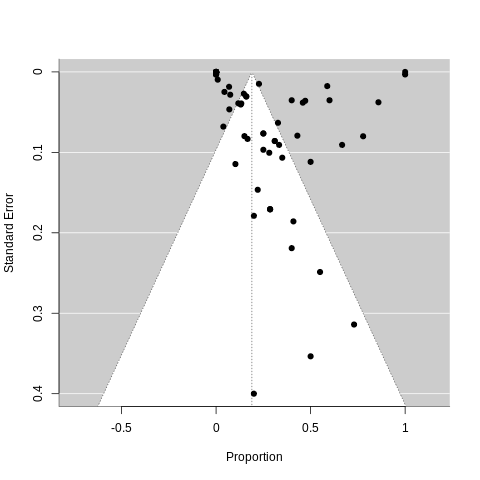

In [36]:
%load_ext rpy2.ipython
from rpy2.robjects.packages import importr

#Import R's "graphics" package
graphics = importr('graphics')

def run_meta_analysis(df):
    #Calculates effect sizes & sampling variances for raw proportions
    xi            = rpy2.robjects.FloatVector( df.Rate*df.N_subgroups )
    ni            = rpy2.robjects.FloatVector( df.N_subgroups )
    slab          = rpy2.robjects.FactorVector( df.Study )
    dat           = metafor.escalc( measure="PR", xi=xi, ni=ni, add=0.00001, to="only0", slab=slab )

    #Builds random-effects model
    with localconverter(rpy2.robjects.default_converter + pandas2ri.converter):
           pd_dat = rpy2.robjects.conversion.rpy2py(dat)

    yi, vi        = rpy2.robjects.FloatVector(pd_dat.yi), rpy2.robjects.FloatVector(pd_dat.vi)
    fit           = metafor.rma(yi=yi, vi=vi, measure="PR", method="DL", test="knha", slab=slab)
    res           = stats.predict(fit)

    #And add the results to the dictionary with appropriate keys
    results       = dict(zip(res.names,list(res)))
    results['I2'] = fit.rx2('I2')[0]

    #Run funnel plot and store the result in a list
    funnel_res = metafor.funnel(fit)

    #Run funnel plot and display it directly in the notebook
    %R -i fit  # Pass the 'fit' variable to R
    %R library(metafor)  # Load the 'metafor' library in R
    %R funnel(fit)  # Create and display the funnel plot. You can add label="out" to display study names

    return results, pd_dat, fit

#Run the function on your dataframe 'forest_df'
results, pd_dat, fit = run_meta_analysis(df_forest)

#### Funel plot (Plotly version)


In [39]:
df_results = pd.DataFrame()

#Iterate over the unique studies in the dataframe
for i in range(len(df_forest)):
    #Subset the data for the current index
    subset = df_forest.iloc[[i]]

    #Run the meta-analysis function for each study
    results, _, _ = run_meta_analysis(subset)

    #Convert the results into a DataFrame
    df_study_results = pd.DataFrame({
    'Study': [subset['Study'].iloc[0]],  # change here
    'Country': [subset['Country'].iloc[0]],
    'Region': [subset['Region'].iloc[0]],
    'Income': [subset['Income_group'].iloc[0]],
    'Treatment': [subset['Treatment'].iloc[0]],
    'Outcome': [subset['Outcome'].iloc[0]],
    'x': [results['x'][0]],
    'y': [results['y'][0]],
    'summary_eff': [results['summary_eff']],
    'se': [results['se']],
    'Rate': [results['Rate'][0]],
    'N_subgroups': [results['N_subgroups'][0]]
})

    #Concatenate the DataFrame to df_results
    df_results = pd.concat([df_results, df_study_results], ignore_index=True)
df_results

,Study,Country,Region,Income,Treatment,Outcome,x,y,summary_eff,se,Rate,N_subgroups
0,"Sacar et al, 2006",Turkey,Europe & Central Asia,Upper middle income,VPS,Mortality_intraop_1st_line,1.428567e-06,0.000452,1.428567e-06,0.000452,0.000000,7
1,"Clemmensen et al, 2010",Denmark,Europe & Central Asia,High income,VPS,Mortality_intraop_1st_line,1.694915e-07,0.000054,1.694915e-07,0.000054,0.000000,59
2,"Sandquist et al, 2003",United States,North America,High income,VPS,Mortality_intraop_1st_line,1.999992e-06,0.000632,1.999992e-06,0.000632,0.000000,5
3,"Bluestone et al, 1972",United States,North America,High income,VPS,Failure_rate,9.999900e-01,0.003162,9.999900e-01,0.003162,1.000000,1
4,"Díaz Llopis et al, 1993",Spain,Europe & Central Asia,High income,VPS,Complication_rate_1st_line,5.879330e-01,0.017635,5.879330e-01,0.017635,0.587933,779
...,...,...,...,...,...,...,...,...,...,...,...,...
76,"Alcocer Maldonado et al, 2017",Mexico,Latin America & Caribbean,Upper middle income,VPS,Mortality_intraop_1st_line,2.127659e-07,0.000067,2.127659e-07,0.000067,0.000000,47
77,"Ojo et al, 2015",Nigeria,Sub-Saharan Africa,Lower middle income,ETV,Failure_rate,1.111109e-06,0.000351,1.111109e-06,0.000351,0.000000,9
78,"Ojo et al, 2015",Nigeria,Sub-Saharan Africa,Lower middle income,ETV,Mortality_intraop_1st_line,1.111109e-06,0.000351,1.111109e-06,0.000351,0.000000,9
79,"Ojo et al, 2015",Nigeria,Sub-Saharan Africa,Lower middle income,ETV,Mortality_periop_1st_line,1.111109e-06,0.000351,1.111109e-06,0.000351,0.000000,9


If you get `KeyError: 'x'` after running the above code block, then sometimes re-running "Using meta-analysis tools" section.


---

The `funnel()` function from the `metafor` package in R creates a scatter plot of the observed effect sizes or outcomes (on the x-axis) against their corresponding standard errors (on the y-axis).

The vertical line represents the mean of all the summary effect estimates, while the diagonal line represents the pseuddo confidence region calculated according to [(Stearn & Egger, 2001)](https://www.sciencedirect.com/science/article/abs/pii/S0895435601003778). This “funnel” shape represents the expected distribution of studies in the absence of heterogeneity or publication bias.

Adapted from [this source](https://www.metafor-project.org/doku.php/plots:funnel_plot_variations), which was originally written in R.

In [45]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=('Failure Rate', 'Complication Rate', 'Mortality Intraoperative', 'Mortality Perioperative'))

#Filter df_results for each outcome
df_Failure_rate = df_results[df_results['Outcome'] == 'Failure_rate'].reset_index(drop=True)
df_Complication_rate_1st_line  = df_results[df_results['Outcome'] == 'Complication_rate_1st_line'].reset_index(drop=True)
df_Mortality_intraop_1st_line = df_results[df_results['Outcome'] == 'Mortality_intraop_1st_line'].reset_index(drop=True)
df_Mortality_periop_1st_line = df_results[df_results['Outcome'] == 'Mortality_periop_1st_line'].reset_index(drop=True)

#List of dataframes to iterate over
dfs = [df_Failure_rate, df_Complication_rate_1st_line, df_Mortality_intraop_1st_line, df_Mortality_periop_1st_line]

#Define the row and column for each plot
positions = [(1, 1), (1, 2), (2, 1), (2,2)]

#Iterate over each dataframe and add a scatter plot to the subplot
for (df, pos) in zip(dfs, positions):
    #Get data from run_meta_analysis function
    results, pd_dat, fit = run_meta_analysis(df)

    #Extract from results dictionary from the run_meta_anlaysis()
    x_var = results['x']
    y_var = results['y']
    summary_eff = results['summary_eff']
    se = results['se']

    #Calculate the bounds of the confidence interval for a range of standard error values
    se_values = np.linspace(min(y_var), max(y_var), 100)
    ci_upper_values = summary_eff + 1.96 * se_values
    ci_lower_values = summary_eff - 1.96 * se_values

    #Create lines at the positions of the upper and lower bounds of the confidence interval
    upper_bound = go.Scatter(x=ci_upper_values, y=se_values, mode='lines', name='Upper Bound', line=dict(color='black', width=1))
    lower_bound = go.Scatter(x=ci_lower_values, y=se_values, mode='lines', name='Lower Bound', line=dict(color='black', width=1))

    #Determine if each point is within the confidence interval
    colors = []
    symbols = []
    for x, y in zip(x_var, y_var):
        ci_upper = summary_eff + 1.96 * y
        ci_lower = summary_eff - 1.96 * y
        if x <= ci_upper and x >= ci_lower:
            colors.append('blue')
            symbols.append('circle')
        else:
            colors.append('red')
            symbols.append('circle-open')

    study_names = df['Study']
    country_names = df['Country']
    region_names = df['Region']
    treatment_names = df['Treatment']
    outcome_names = df['Outcome']
    income_names = df['Income']

    hover_text = []
    for i in range(len(study_names)):
        hover_text.append('Study: ' + study_names[i] + '<br>Country: ' + country_names[i] + '<br>Region: ' + region_names[i] + '<br>Treatment: ' + treatment_names[i] + '<br>Outcome: ' + outcome_names[i] + '<br>Income Group: ' + income_names[i])

    scatter = go.Scatter(x=x_var, y=y_var, mode='markers', name='Log OR, SE',
                         marker=dict(color=colors, symbol=symbols, opacity=0.4), text=hover_text)

    #Create vertical line at the position of the summary effect size
    vline = go.Scatter(x=[summary_eff, summary_eff], y=[min(y_var), max(y_var)],
                       mode='lines',
                       name='Summary Estimate',
                       line=dict(color='green', width=1, dash='dash'))

    #Add vertical line
    fig.add_trace(scatter, row=pos[0], col=pos[1])
    fig.add_trace(vline, row=pos[0], col=pos[1])

    #Add upper and lower bound lines
    fig.add_trace(upper_bound, row=pos[0], col=pos[1])
    fig.add_trace(lower_bound, row=pos[0], col=pos[1])


#Define common properties
common_xaxis = dict(title='Log Odds Ratio')
common_yaxis = dict(autorange="reversed")

fig.update_layout(
    title_text="Funnel Plots By Outcome Type",
    height=800,
    width=900,
    font=dict(family="Arial", color="black"),
    title_font=dict(family="Arial", color="black"),
    plot_bgcolor='white',
    xaxis=common_xaxis,
    xaxis2=common_xaxis,
    xaxis3=common_xaxis,
    xaxis4=common_xaxis,
    yaxis=dict(title='Standard Error', **common_yaxis),
    yaxis2=common_yaxis,
    yaxis3=dict(title='Standard Error', **common_yaxis),
    yaxis4=common_yaxis,
    showlegend=False,
    autosize=False,
)

fig.show()

#### Funnel plot (hvplot version)

The below code block will produce 4 subplots. You can interact with the figure by scrolling. If you scroll on an axis, the scale will be changed, if you scroll on the graph space, the figure will zoom into the location. It is suggested to zoom in areas were there are high density of overlapping points to allow for better inspection of the data.

If more than one study have duplicate coordinates, the hover bow will aggregate all the information together in a single window (this functionality is not available in plotly, which is why we use hvplot instead). If you zoom into the subplot further, the overlapping points will seperate, allowing for easier viewing of the respective hover text.

In [53]:
import hvplot.pandas as hv
import holoviews as hvv
import panel as pn
from bokeh.models import HoverTool

outcomes = ['Failure_rate', 'Complication_rate_1st_line', 'Mortality_intraop_1st_line', 'Mortality_periop_1st_line']
titles = ['Failure Rate', 'Complication Rate', 'Mortality Intraoperative', 'Mortality Perioperative']

plots = []

#Iterate over each outcome and create a scatter plot
for outcome, title in zip(outcomes, titles):
    #Filter df_results for each outcome
    df = df_results[df_results['Outcome'] == outcome].reset_index(drop=True)

    #Get data from run_meta_analysis function
    results, pd_dat, fit = run_meta_analysis(df)

    #Extract from results dictionary from the run_meta_anlaysis()
    x_var = results['x']
    y_var = results['y']
    summary_eff = results['summary_eff']
    se = results['se']

    #Calculate the bounds of the confidence interval for each row in the dataframe
    df['ci_upper_values'] = summary_eff + 1.96 * df['se']
    df['ci_lower_values'] = summary_eff - 1.96 * df['se']

    #Create lines at the positions of the upper and lower bounds of the confidence interval
    upper_bound = hvv.Curve((df['ci_upper_values'], y_var), label='Upper Bound').opts(color='black', line_width=0.6, show_legend=False)
    lower_bound = hvv.Curve((df['ci_lower_values'], y_var), label='Lower Bound').opts(color='black', line_width=0.6, show_legend=False)

    #Calculate if x is within the confidence interval
    df['in_ci'] = (df['x'] <= df['ci_upper_values']) & (df['x'] >= df['ci_lower_values'])

    #Create scatter plots with hvplot for each dataframe and overlay them
    df_within_ci = df[df['in_ci'] == True]
    df_outside_ci = df[df['in_ci'] == False]

    #Create scatter plots with hvplot for each dataframe and overlay them
    scatter_plot_within_ci = df_within_ci.hvplot.scatter('x', 'y', hover_cols=['Study', 'Country', 'Region', 'Treatment']).opts(color='green', marker='o', size=3, show_legend=False, alpha=0.5, title=title)
    scatter_plot_outside_ci = df_outside_ci.hvplot.scatter('x', 'y', hover_cols=['Study', 'Country', 'Region', 'Treatment']).opts(color='red', marker='+', size=3, show_legend=False, alpha=0.5, title=title)

    #Create vertical line at the position of the summary effect size
    lower_limit = df['y'].min()
    upper_limit = df['y'].max()

    vline = hvv.Curve([(summary_eff, lower_limit), (summary_eff, upper_limit)]).opts(color='green', line_width=0.4, line_dash='dotted')

    #Calculate the minimum and maximum 'x' values for the data
    x_min = df['x'].min()
    x_max = df['x'].max()

    final_plot = (vline * upper_bound * lower_bound * scatter_plot_within_ci * scatter_plot_outside_ci).opts(shared_axes=False, width=700, height=400)

    #Set the background color to light gray and let HoloViews adjust the y-axis range automatically
    final_plot.opts(invert_yaxis=True)

    #Set the axis labels
    final_plot = final_plot.redim.label(x='log Odds Ratio', y='Standard Error')

    #Add final plot to the list of plots
    plots.append(final_plot)

    #Create a Layout with HoloViews
    layout = hvv.Layout(plots).cols(2)

    pn.panel(layout)
pn.GridBox(*plots, ncols=2)

GridBox(ncols=2)
    [0] HoloViews(Overlay, height=400, sizing_mode='fixed', width=700)
    [1] HoloViews(Overlay, height=400, sizing_mode='fixed', width=700)
    [2] HoloViews(Overlay, height=400, sizing_mode='fixed', width=700)
    [3] HoloViews(Overlay, height=400, sizing_mode='fixed', width=700)